In [1]:
%run imports.py
%run utils.py
%run leer_red.py

red = leer_subred_nx() # Tarda ~20s
red_df = leer_subred_df()

fp = f"results/label_spreading.top40.tsv.gz"

resultados = pd.read_table(fp)

/home/juan/miniconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
fenos_a_quitar = [
    'Cognitive ability, years of educational attainment or schizophrenia (pleiotropy)',
    'Heart rate in heart failure with reduced ejection fraction',
    'Colorectal cancer or advanced adenoma'
]
resultados = resultados[
    ~resultados.nodos_entrada.isin(fenos_a_quitar) &
    ~resultados.nodo_salida.isin(fenos_a_quitar)
].reset_index(drop=True)

resultados.head()

nodos_entrada   nodo_salida  prediccion tipo_de_nodo  es_fenotipo  \
0  Adventurousness    rs734073-T    0.024736        alelo        False   
1  Adventurousness  rs28646179-A    0.024736        alelo        False   
2  Adventurousness  rs72762188-A    0.024736        alelo        False   
3  Adventurousness  rs17201148-A    0.024736        alelo        False   
4  Adventurousness  rs60843830-C    0.024736        alelo        False   

  categoria_fenotipo  prediccion_log10  k_nodo_entrada  k_nodo_salida  \
0                NaN         -1.606671             167              2   
1                NaN         -1.606671             167              2   
2                NaN         -1.606671             167              2   
3                NaN         -1.606671             167              2   
4                NaN         -1.606671             167              2   

   pred_rank  
0        6.5  
1        6.5  
2        6.5  
3        6.5  
4        6.5

## Valores de spreading para distintos fenotipos de entrada

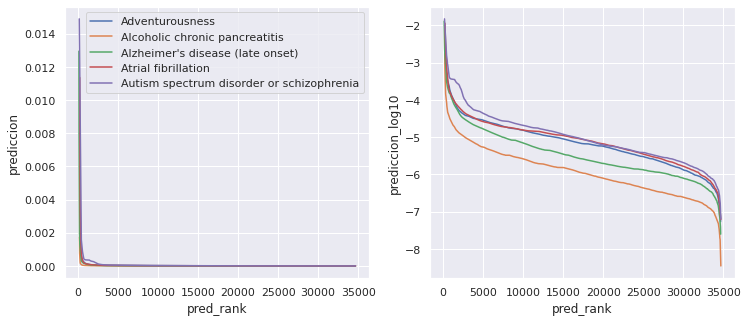

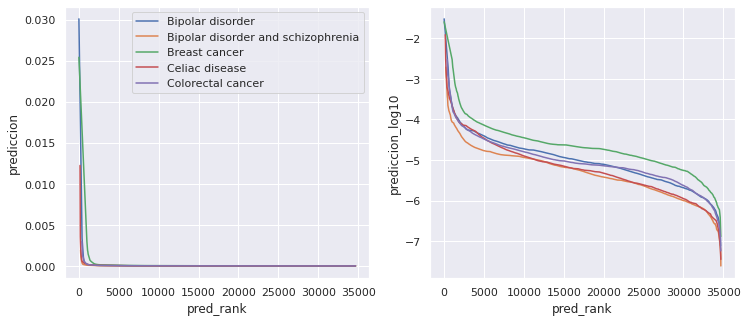

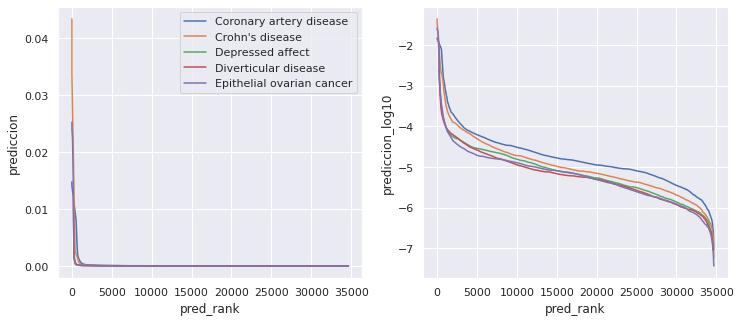

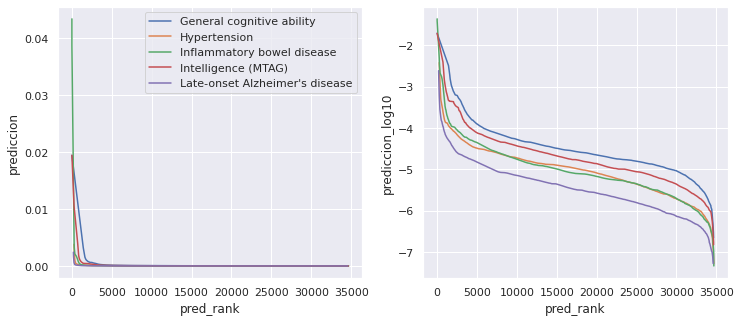

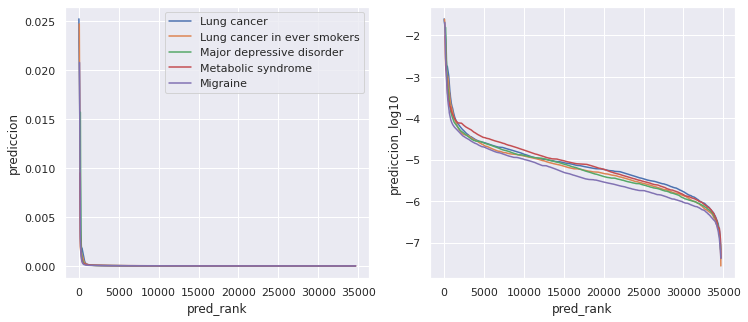

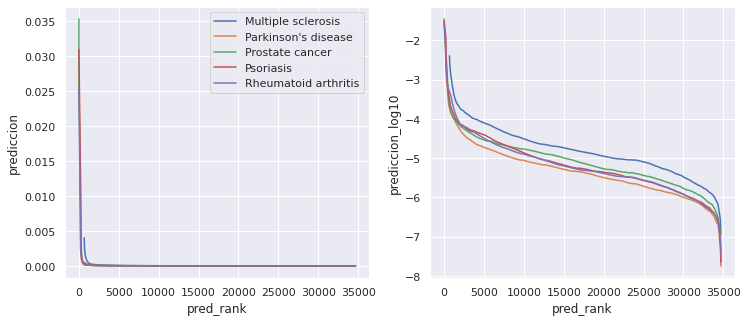

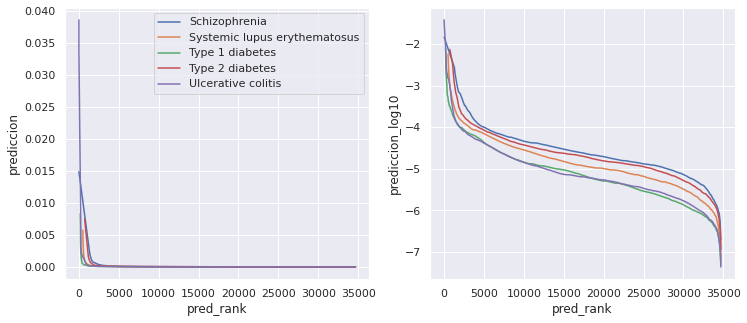

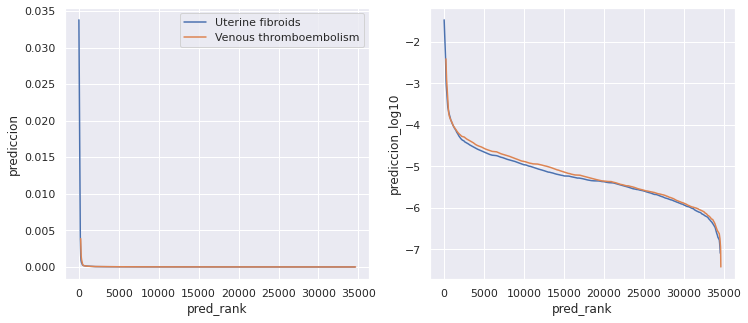

In [3]:
fenos_entrada = list(resultados.nodos_entrada.unique())

ncols = 5
nrows = 2
width = ncols * 5
height = nrows * 5

for grupo_fenos in sliced(fenos_entrada, 5):
    plt.figure(figsize=(12, 5))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    
    for feno_entrada in grupo_fenos:
        opts = {
            "x": "pred_rank",
            "data": resultados.query("nodos_entrada == @feno_entrada").query("es_fenotipo"),
            "label": feno_entrada
        }
        sns.lineplot(**opts, y="prediccion", ax=ax1)
        sns.lineplot(**opts, y="prediccion_log10", ax=ax2)
        ax2.get_legend().remove()

    plt.show()

In [4]:
def break_long_text(s):
    words = s.split(" ")
    
    if len(words) < 6:
        return s
    
    half_words = len(words)//2
    
    return (
        " ".join(words[:half_words]) +
        "\n" +
        " ".join(words[half_words:])
    )

100%|██████████| 15/15 [00:00<00:00, 168.98it/s]


134 nodos a conservar


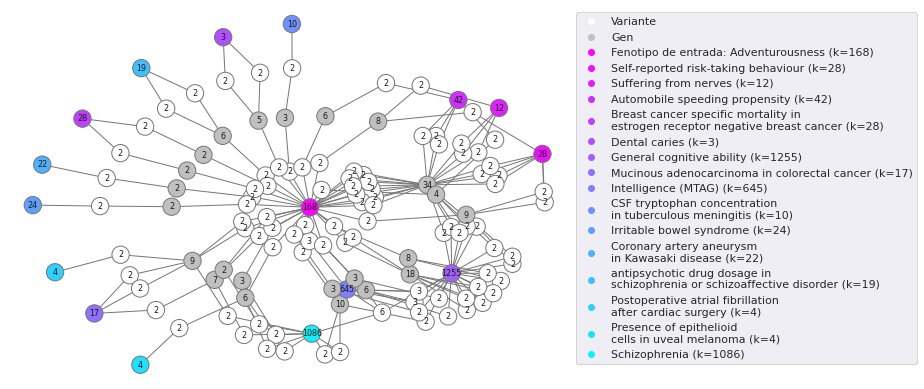

nodos_entrada  \
nodo_salida                                                                                     
Self-reported risk-taking behaviour                                           Adventurousness   
Suffering from nerves                                                         Adventurousness   
Automobile speeding propensity                                                Adventurousness   
Breast cancer specific mortality in estrogen receptor negative breast cancer  Adventurousness   
Dental caries                                                                 Adventurousness   
General cognitive ability                                                     Adventurousness   
Mucinous adenocarcinoma in colorectal cancer                                  Adventurousness   
Intelligence (MTAG)                                                           Adventurousness   
CSF tryptophan concentration in tuberculous meningitis                        Adventurousness   
Irritable bowel syndrome                                                      Adventurousness   
Coronary artery aneurysm in Kawasaki disease                                  Adventurousness   
antipsychotic drug dosage in schizophrenia or schizoaffective disorder        Adventurousness   
Postoperative atrial fibrillation after cardiac surgery                       Adventurousness   
Presence of epithelioid cells in uveal melanoma                               Adventurousness   
Schizophrenia                                                                 Adventurousness   

                                                                              prediccion  \
nodo_salida                                                                                
Self-reported risk-taking behaviour                                             0.002520   
Suffering from nerves                                                           0.002299   
Automobile speeding propensity                                                  0.001819   
Breast cancer specific mortality in estrogen receptor negative breast cancer    0.001735   
Dental caries                                                                   0.001643   
General cognitive ability                                                       0.001321   
Mucinous adenocarcinoma in colorectal cancer                                    0.001257   
Intelligence (MTAG)                                                             0.001171   
CSF tryptophan concentration in tuberculous meningitis                          0.001016   
Irritable bowel syndrome                                                        0.000947   
Coronary artery aneurysm in Kawasaki disease                                    0.000918   
antipsychotic drug dosage in schizophrenia or schizoaffective disorder          0.000861   
Postoperative atrial fibrillation after cardiac surgery                         0.000859   
Presence of epithelioid cells in uveal melanoma                                 0.000791   
Schizophrenia                                                                   0.000705   

                                                                             tipo_de_nodo  \
nodo_salida                                                                                 
Self-reported risk-taking behaviour                                              fenotipo   
Suffering from nerves                                                            fenotipo   
Automobile speeding propensity                                                   fenotipo   
Breast cancer specific mortality in estrogen receptor negative breast cancer     fenotipo   
Dental caries                                                                    fenotipo   
General cognitive ability                                                        fenotipo   
Mucinous adenocarcinoma in colorectal cancer                                     fenotipo   
Intelligence (MTAG)         

100%|██████████| 15/15 [00:00<00:00, 101.01it/s]



 -------------------------------------------------------------------------------- 


54 nodos a conservar


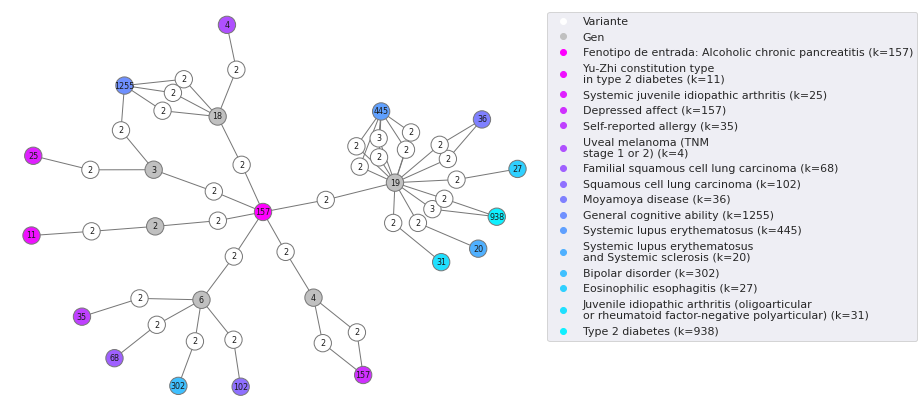

nodos_entrada  \
nodo_salida                                                                                                                  
Yu-Zhi constitution type in type 2 diabetes                                                 Alcoholic chronic pancreatitis   
Systemic juvenile idiopathic arthritis                                                      Alcoholic chronic pancreatitis   
Depressed affect                                                                            Alcoholic chronic pancreatitis   
Self-reported allergy                                                                       Alcoholic chronic pancreatitis   
Uveal melanoma (TNM stage 1 or 2)                                                           Alcoholic chronic pancreatitis   
Familial squamous cell lung carcinoma                                                       Alcoholic chronic pancreatitis   
Squamous cell lung carcinoma                                                                Alcoholic chronic pancreatitis   
Moyamoya disease                                                                            Alcoholic chronic pancreatitis   
General cognitive ability                                                                   Alcoholic chronic pancreatitis   
Systemic lupus erythematosus                                                                Alcoholic chronic pancreatitis   
Systemic lupus erythematosus and Systemic sclerosis                                         Alcoholic chronic pancreatitis   
Bipolar disorder                                                                            Alcoholic chronic pancreatitis   
Eosinophilic esophagitis                                                                    Alcoholic chronic pancreatitis   
Juvenile idiopathic arthritis (oligoarticular or rheumatoid factor-negative polyarticular)  Alcoholic chronic pancreatitis   
Type 2 diabetes                                                                             Alcoholic chronic pancreatitis   

                                                                                            prediccion  \
nodo_salida                                                                                              
Yu-Zhi constitution type in type 2 diabetes                                                   0.001744   
Systemic juvenile idiopathic arthritis                                                        0.000772   
Depressed affect                                                                              0.000407   
Self-reported allergy                                                                         0.000282   
Uveal melanoma (TNM stage 1 or 2)                                                             0.000237   
Familial squamous cell lung carcinoma                                                         0.000211   
Squamous cell lung carcinoma                                                                  0.000158   
Moyamoya disease                                                                              0.000152   
General cognitive ability                                                                     0.000145   
Systemic lupus erythematosus                                                                  0.000145   
Systemic lupus erythematosus and Systemic sclerosis                                           0.000112   
Bipolar disorder                                                                              0.000101   
Eosinophilic esophagitis                                                                      0.000095   
Juvenile idiopathic arthritis (oligoarticular or rheumatoid factor-negative polyarticular)    0.000081   
Type 2 diabetes                                                                               0.000075   

                                                                                           tipo_de_nodo  \
nodo_salida                                             

100%|██████████| 15/15 [00:00<00:00, 218.89it/s]



 -------------------------------------------------------------------------------- 


57 nodos a conservar


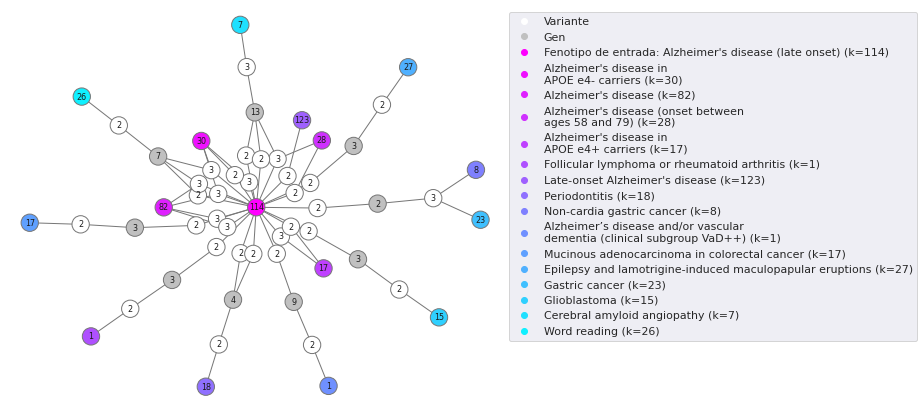

nodos_entrada  \
nodo_salida                                                                                                
Alzheimer's disease in APOE e4- carriers                                Alzheimer's disease (late onset)   
Alzheimer's disease                                                     Alzheimer's disease (late onset)   
Alzheimer's disease (onset between ages 58 and 79)                      Alzheimer's disease (late onset)   
Alzheimer's disease in APOE e4+ carriers                                Alzheimer's disease (late onset)   
Follicular lymphoma or rheumatoid arthritis                             Alzheimer's disease (late onset)   
Late-onset Alzheimer's disease                                          Alzheimer's disease (late onset)   
Periodontitis                                                           Alzheimer's disease (late onset)   
Non-cardia gastric cancer                                               Alzheimer's disease (late onset)   
Alzheimer’s disease and/or vascular dementia (clinical subgroup VaD++)  Alzheimer's disease (late onset)   
Mucinous adenocarcinoma in colorectal cancer                            Alzheimer's disease (late onset)   
Epilepsy and lamotrigine-induced maculopapular eruptions                Alzheimer's disease (late onset)   
Gastric cancer                                                          Alzheimer's disease (late onset)   
Glioblastoma                                                            Alzheimer's disease (late onset)   
Cerebral amyloid angiopathy                                             Alzheimer's disease (late onset)   
Word reading                                                            Alzheimer's disease (late onset)   

                                                                        prediccion  \
nodo_salida                                                                          
Alzheimer's disease in APOE e4- carriers                                  0.012942   
Alzheimer's disease                                                       0.011554   
Alzheimer's disease (onset between ages 58 and 79)                        0.008495   
Alzheimer's disease in APOE e4+ carriers                                  0.007970   
Follicular lymphoma or rheumatoid arthritis                               0.002324   
Late-onset Alzheimer's disease                                            0.002034   
Periodontitis                                                             0.001299   
Non-cardia gastric cancer                                                 0.000885   
Alzheimer’s disease and/or vascular dementia (clinical subgroup VaD++)    0.000797   
Mucinous adenocarcinoma in colorectal cancer                              0.000792   
Epilepsy and lamotrigine-induced maculopapular eruptions                  0.000762   
Gastric cancer                                                            0.000629   
Glioblastoma                                                              0.000610   
Cerebral amyloid angiopathy                                               0.000597   
Word reading                                                              0.000595   

                                                                       tipo_de_nodo  \
nodo_salida                                                                           
Alzheimer's disease in APOE e4- carriers                                   fenotipo   
Alzheimer's disease                                                        fenotipo   
Alzheimer's disease (onset between ages 58 and 79)                         fenotipo   
Alzheimer's disease in APOE e4+ carriers                                   fenotipo   
Follicular lymphoma or rheumatoid arthritis                                fenotipo   
Late-onset Alzheimer's disease                                             fenotipo   
Periodontitis                                                              fenotipo   
Non-card

100%|██████████| 15/15 [00:00<00:00, 208.99it/s]



 -------------------------------------------------------------------------------- 


67 nodos a conservar


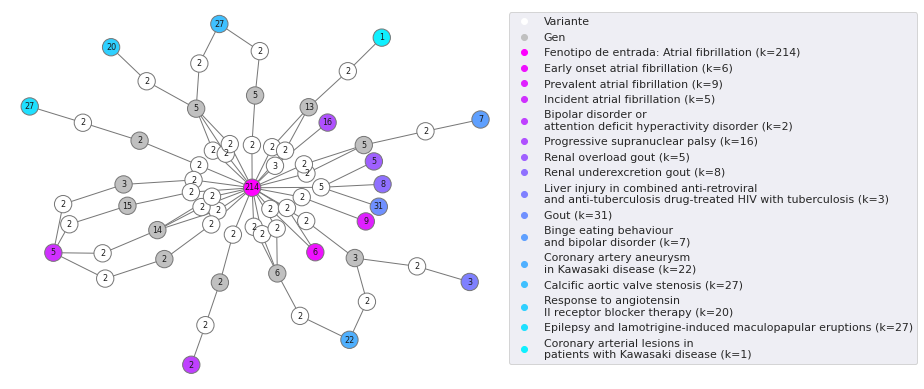

nodos_entrada  \
nodo_salida                                                                                                              
Early onset atrial fibrillation                                                                    Atrial fibrillation   
Prevalent atrial fibrillation                                                                      Atrial fibrillation   
Incident atrial fibrillation                                                                       Atrial fibrillation   
Bipolar disorder or attention deficit hyperactivity disorder                                       Atrial fibrillation   
Progressive supranuclear palsy                                                                     Atrial fibrillation   
Renal overload gout                                                                                Atrial fibrillation   
Renal underexcretion gout                                                                          Atrial fibrillation   
Liver injury in combined anti-retroviral and anti-tuberculosis drug-treated HIV with tuberculosis  Atrial fibrillation   
Gout                                                                                               Atrial fibrillation   
Binge eating behaviour and bipolar disorder                                                        Atrial fibrillation   
Coronary artery aneurysm in Kawasaki disease                                                       Atrial fibrillation   
Calcific aortic valve stenosis                                                                     Atrial fibrillation   
Response to angiotensin II receptor blocker therapy                                                Atrial fibrillation   
Epilepsy and lamotrigine-induced maculopapular eruptions                                           Atrial fibrillation   
Coronary arterial lesions in patients with Kawasaki disease                                        Atrial fibrillation   

                                                                                                   prediccion  \
nodo_salida                                                                                                     
Early onset atrial fibrillation                                                                      0.011352   
Prevalent atrial fibrillation                                                                        0.008577   
Incident atrial fibrillation                                                                         0.003256   
Bipolar disorder or attention deficit hyperactivity disorder                                         0.002387   
Progressive supranuclear palsy                                                                       0.002277   
Renal overload gout                                                                                  0.002117   
Renal underexcretion gout                                                                            0.001822   
Liver injury in combined anti-retroviral and anti-tuberculosis drug-treated HIV with tuberculosis    0.001654   
Gout                                                                                                 0.001408   
Binge eating behaviour and bipolar disorder                                                          0.001319   
Coronary artery aneurysm in Kawasaki disease                                                         0.001151   
Calcific aortic valve stenosis                                                                       0.001098   
Response to angiotensin II receptor blocker therapy                                                  0.000969   
Epilepsy and lamotrigine-induced maculopapular eruptions                                             0.000852   
Coronary arterial lesions in patients with Kawasaki disease                                          0.000845   

                                                                                                  tipo_de_no

100%|██████████| 15/15 [00:00<00:00, 107.12it/s]



 -------------------------------------------------------------------------------- 


194 nodos a conservar


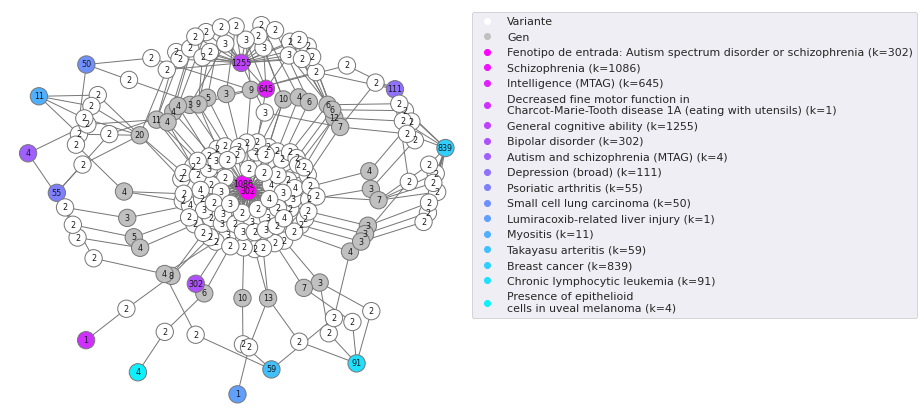

nodos_entrada  \
nodo_salida                                                                                                                         
Schizophrenia                                                                           Autism spectrum disorder or schizophrenia   
Intelligence (MTAG)                                                                     Autism spectrum disorder or schizophrenia   
Decreased fine motor function in Charcot-Marie-Tooth disease 1A (eating with utensils)  Autism spectrum disorder or schizophrenia   
General cognitive ability                                                               Autism spectrum disorder or schizophrenia   
Bipolar disorder                                                                        Autism spectrum disorder or schizophrenia   
Autism and schizophrenia (MTAG)                                                         Autism spectrum disorder or schizophrenia   
Depression (broad)                                                                      Autism spectrum disorder or schizophrenia   
Psoriatic arthritis                                                                     Autism spectrum disorder or schizophrenia   
Small cell lung carcinoma                                                               Autism spectrum disorder or schizophrenia   
Lumiracoxib-related liver injury                                                        Autism spectrum disorder or schizophrenia   
Myositis                                                                                Autism spectrum disorder or schizophrenia   
Takayasu arteritis                                                                      Autism spectrum disorder or schizophrenia   
Breast cancer                                                                           Autism spectrum disorder or schizophrenia   
Chronic lymphocytic leukemia                                                            Autism spectrum disorder or schizophrenia   
Presence of epithelioid cells in uveal melanoma                                         Autism spectrum disorder or schizophrenia   

                                                                                        prediccion  \
nodo_salida                                                                                          
Schizophrenia                                                                             0.014889   
Intelligence (MTAG)                                                                       0.001572   
Decreased fine motor function in Charcot-Marie-Tooth disease 1A (eating with utensils)    0.001267   
General cognitive ability                                                                 0.001193   
Bipolar disorder                                                                          0.001143   
Autism and schizophrenia (MTAG)                                                           0.001139   
Depression (broad)                                                                        0.000931   
Psoriatic arthritis                                                                       0.000919   
Small cell lung carcinoma                                                                 0.000887   
Lumiracoxib-related liver injury                                                          0.000809   
Myositis                                                                                  0.000762   
Takayasu arteritis                                                                        0.000644   
Breast cancer                                                                             0.000643   
Chronic lymphocytic leukemia                                                              0.000636   
Presence of epithelioid cells in uveal melanoma                                           0.000624   

                                                                                       tipo_de_nodo  \
nodo_salida     

100%|██████████| 15/15 [00:00<00:00, 130.98it/s]



 -------------------------------------------------------------------------------- 


93 nodos a conservar


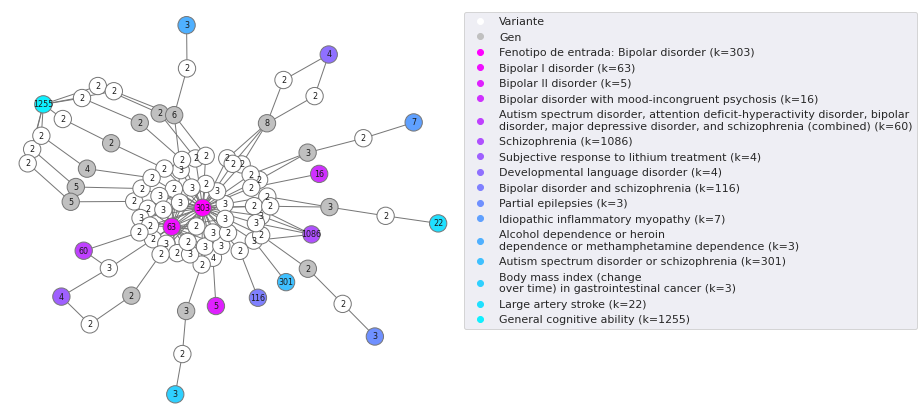

nodos_entrada  \
nodo_salida                                                                                                                                                       
Bipolar I disorder                                                                                                                             Bipolar disorder   
Bipolar II disorder                                                                                                                            Bipolar disorder   
Bipolar disorder with mood-incongruent psychosis                                                                                               Bipolar disorder   
Autism spectrum disorder, attention deficit-hyperactivity disorder, bipolar disorder, major depressive disorder, and schizophrenia (combined)  Bipolar disorder   
Schizophrenia                                                                                                                                  Bipolar disorder   
Subjective response to lithium treatment                                                                                                       Bipolar disorder   
Developmental language disorder                                                                                                                Bipolar disorder   
Bipolar disorder and schizophrenia                                                                                                             Bipolar disorder   
Partial epilepsies                                                                                                                             Bipolar disorder   
Idiopathic inflammatory myopathy                                                                                                               Bipolar disorder   
Alcohol dependence or heroin dependence or methamphetamine dependence                                                                          Bipolar disorder   
Autism spectrum disorder or schizophrenia                                                                                                      Bipolar disorder   
Body mass index (change over time) in gastrointestinal cancer                                                                                  Bipolar disorder   
Large artery stroke                                                                                                                            Bipolar disorder   
General cognitive ability                                                                                                                      Bipolar disorder   

                                                                                                                                               prediccion  \
nodo_salida                                                                                                                                                 
Bipolar I disorder                                                                                                                               0.030087   
Bipolar II disorder                                                                                                                              0.003636   
Bipolar disorder with mood-incongruent psychosis                                                                                                 0.003377   
Autism spectrum disorder, attention deficit-hyperactivity disorder, bipolar disorder, major depressive disorder, and schizophrenia (combined)    0.002324   
Schizophrenia                                                                                                                                    0.002235   
Subjective response to lithium treatment                                                                                                         0.002090   
Developmental language disorder                                                                                       

100%|██████████| 15/15 [00:00<00:00, 248.38it/s]



 -------------------------------------------------------------------------------- 


60 nodos a conservar


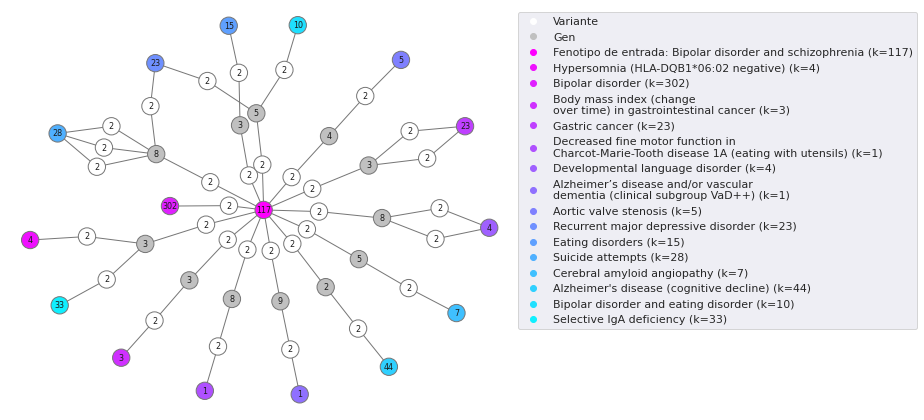

nodos_entrada  \
nodo_salida                                                                                                                  
Hypersomnia (HLA-DQB1*06:02 negative)                                                   Bipolar disorder and schizophrenia   
Bipolar disorder                                                                        Bipolar disorder and schizophrenia   
Body mass index (change over time) in gastrointestinal cancer                           Bipolar disorder and schizophrenia   
Gastric cancer                                                                          Bipolar disorder and schizophrenia   
Decreased fine motor function in Charcot-Marie-Tooth disease 1A (eating with utensils)  Bipolar disorder and schizophrenia   
Developmental language disorder                                                         Bipolar disorder and schizophrenia   
Alzheimer’s disease and/or vascular dementia (clinical subgroup VaD++)                  Bipolar disorder and schizophrenia   
Aortic valve stenosis                                                                   Bipolar disorder and schizophrenia   
Recurrent major depressive disorder                                                     Bipolar disorder and schizophrenia   
Eating disorders                                                                        Bipolar disorder and schizophrenia   
Suicide attempts                                                                        Bipolar disorder and schizophrenia   
Cerebral amyloid angiopathy                                                             Bipolar disorder and schizophrenia   
Alzheimer's disease (cognitive decline)                                                 Bipolar disorder and schizophrenia   
Bipolar disorder and eating disorder                                                    Bipolar disorder and schizophrenia   
Selective IgA deficiency                                                                Bipolar disorder and schizophrenia   

                                                                                        prediccion  \
nodo_salida                                                                                          
Hypersomnia (HLA-DQB1*06:02 negative)                                                     0.001937   
Bipolar disorder                                                                          0.001827   
Body mass index (change over time) in gastrointestinal cancer                             0.001541   
Gastric cancer                                                                            0.001250   
Decreased fine motor function in Charcot-Marie-Tooth disease 1A (eating with utensils)    0.001017   
Developmental language disorder                                                           0.001014   
Alzheimer’s disease and/or vascular dementia (clinical subgroup VaD++)                    0.000817   
Aortic valve stenosis                                                                     0.000776   
Recurrent major depressive disorder                                                       0.000772   
Eating disorders                                                                          0.000765   
Suicide attempts                                                                          0.000742   
Cerebral amyloid angiopathy                                                               0.000705   
Alzheimer's disease (cognitive decline)                                                   0.000681   
Bipolar disorder and eating disorder                                                      0.000659   
Selective IgA deficiency                                                                  0.000621   

                                                                                       tipo_de_nodo  \
nodo_salida                                                                                           
Hypersomnia (HLA-DQB1*06:

 47%|████▋     | 7/15 [00:00<00:00, 69.78it/s]



 -------------------------------------------------------------------------------- 




100%|██████████| 15/15 [00:00<00:00, 69.23it/s]


98 nodos a conservar


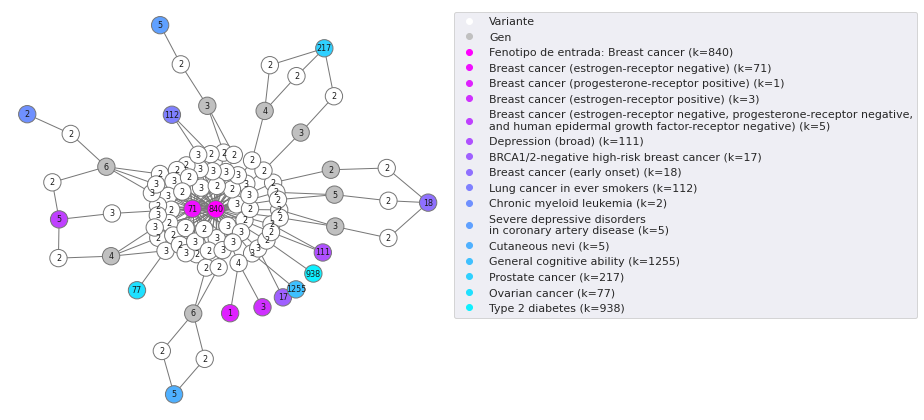

nodos_entrada  \
nodo_salida                                                                                                                                      
Breast cancer (estrogen-receptor negative)                                                                                       Breast cancer   
Breast cancer (progesterone-receptor positive)                                                                                   Breast cancer   
Breast cancer (estrogen-receptor positive)                                                                                       Breast cancer   
Breast cancer (estrogen-receptor negative, progesterone-receptor negative, and human epidermal growth factor-receptor negative)  Breast cancer   
Depression (broad)                                                                                                               Breast cancer   
BRCA1/2-negative high-risk breast cancer                                                                                         Breast cancer   
Breast cancer (early onset)                                                                                                      Breast cancer   
Lung cancer in ever smokers                                                                                                      Breast cancer   
Chronic myeloid leukemia                                                                                                         Breast cancer   
Severe depressive disorders in coronary artery disease                                                                           Breast cancer   
Cutaneous nevi                                                                                                                   Breast cancer   
General cognitive ability                                                                                                        Breast cancer   
Prostate cancer                                                                                                                  Breast cancer   
Ovarian cancer                                                                                                                   Breast cancer   
Type 2 diabetes                                                                                                                  Breast cancer   

                                                                                                                                 prediccion  \
nodo_salida                                                                                                                                   
Breast cancer (estrogen-receptor negative)                                                                                         0.025408   
Breast cancer (progesterone-receptor positive)                                                                                     0.003006   
Breast cancer (estrogen-receptor positive)                                                                                         0.002984   
Breast cancer (estrogen-receptor negative, progesterone-receptor negative, and human epidermal growth factor-receptor negative)    0.001887   
Depression (broad)                                                                                                                 0.001791   
BRCA1/2-negative high-risk breast cancer                                                                                           0.001637   
Breast cancer (early onset)                                                                                                        0.001552   
Lung cancer in ever smokers                                                                                                        0.001440   
Chronic myeloid leukemia                                                                                                           0.001203   
Severe depressive disorders in coronary artery disease                   

100%|██████████| 15/15 [00:00<00:00, 281.59it/s]



 -------------------------------------------------------------------------------- 


38 nodos a conservar


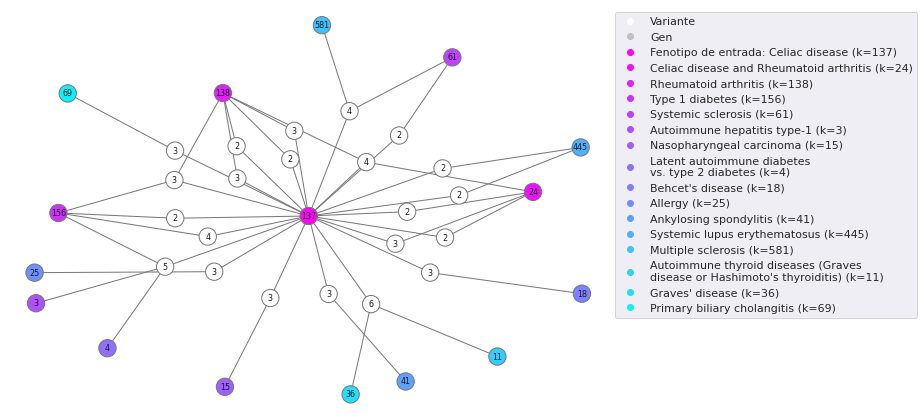

nodos_entrada  \
nodo_salida                                                                               
Celiac disease and Rheumatoid arthritis                                  Celiac disease   
Rheumatoid arthritis                                                     Celiac disease   
Type 1 diabetes                                                          Celiac disease   
Systemic sclerosis                                                       Celiac disease   
Autoimmune hepatitis type-1                                              Celiac disease   
Nasopharyngeal carcinoma                                                 Celiac disease   
Latent autoimmune diabetes vs. type 2 diabetes                           Celiac disease   
Behcet's disease                                                         Celiac disease   
Allergy                                                                  Celiac disease   
Ankylosing spondylitis                                                   Celiac disease   
Systemic lupus erythematosus                                             Celiac disease   
Multiple sclerosis                                                       Celiac disease   
Autoimmune thyroid diseases (Graves disease or Hashimoto's thyroiditis)  Celiac disease   
Graves' disease                                                          Celiac disease   
Primary biliary cholangitis                                              Celiac disease   

                                                                         prediccion  \
nodo_salida                                                                           
Celiac disease and Rheumatoid arthritis                                    0.012236   
Rheumatoid arthritis                                                       0.008207   
Type 1 diabetes                                                            0.004861   
Systemic sclerosis                                                         0.003643   
Autoimmune hepatitis type-1                                                0.003588   
Nasopharyngeal carcinoma                                                   0.003180   
Latent autoimmune diabetes vs. type 2 diabetes                             0.003042   
Behcet's disease                                                           0.003019   
Allergy                                                                    0.002550   
Ankylosing spondylitis                                                     0.002302   
Systemic lupus erythematosus                                               0.002152   
Multiple sclerosis                                                         0.002150   
Autoimmune thyroid diseases (Graves disease or Hashimoto's thyroiditis)    0.002111   
Graves' disease                                                            0.002005   
Primary biliary cholangitis                                                0.001749   

                                                                        tipo_de_nodo  \
nodo_salida                                                                            
Celiac disease and Rheumatoid arthritis                                     fenotipo   
Rheumatoid arthritis                                                        fenotipo   
Type 1 diabetes                                                             fenotipo   
Systemic sclerosis                                                          fenotipo   
Autoimmune hepatitis type-1                                                 fenotipo   
Nasopharyngeal carcinoma                                                    fenotipo   
Latent autoimmune diabetes vs. type 2 diabetes                              fenotipo   
Behcet's disease                                                            fenotipo   
Allergy                                                                     fenotipo   
Ankylosing spondylitis                                                      fe

100%|██████████| 15/15 [00:00<00:00, 134.96it/s]



 -------------------------------------------------------------------------------- 


68 nodos a conservar


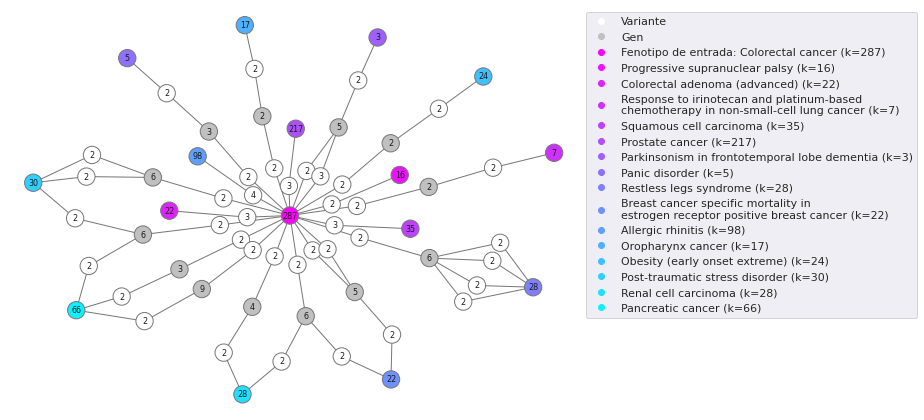

nodos_entrada  \
nodo_salida                                                                                               
Progressive supranuclear palsy                                                        Colorectal cancer   
Colorectal adenoma (advanced)                                                         Colorectal cancer   
Response to irinotecan and platinum-based chemotherapy in non-small-cell lung cancer  Colorectal cancer   
Squamous cell carcinoma                                                               Colorectal cancer   
Prostate cancer                                                                       Colorectal cancer   
Parkinsonism in frontotemporal lobe dementia                                          Colorectal cancer   
Panic disorder                                                                        Colorectal cancer   
Restless legs syndrome                                                                Colorectal cancer   
Breast cancer specific mortality in estrogen receptor positive breast cancer          Colorectal cancer   
Allergic rhinitis                                                                     Colorectal cancer   
Oropharynx cancer                                                                     Colorectal cancer   
Obesity (early onset extreme)                                                         Colorectal cancer   
Post-traumatic stress disorder                                                        Colorectal cancer   
Renal cell carcinoma                                                                  Colorectal cancer   
Pancreatic cancer                                                                     Colorectal cancer   

                                                                                      prediccion  \
nodo_salida                                                                                        
Progressive supranuclear palsy                                                          0.002982   
Colorectal adenoma (advanced)                                                           0.001997   
Response to irinotecan and platinum-based chemotherapy in non-small-cell lung cancer    0.001635   
Squamous cell carcinoma                                                                 0.001422   
Prostate cancer                                                                         0.001258   
Parkinsonism in frontotemporal lobe dementia                                            0.001027   
Panic disorder                                                                          0.001013   
Restless legs syndrome                                                                  0.001001   
Breast cancer specific mortality in estrogen receptor positive breast cancer            0.000872   
Allergic rhinitis                                                                       0.000814   
Oropharynx cancer                                                                       0.000761   
Obesity (early onset extreme)                                                           0.000662   
Post-traumatic stress disorder                                                          0.000585   
Renal cell carcinoma                                                                    0.000579   
Pancreatic cancer                                                                       0.000577   

                                                                                     tipo_de_nodo  \
nodo_salida                                                                                         
Progressive supranuclear palsy                                                           fenotipo   
Colorectal adenoma (advanced)                                                            fenotipo   
Response to irinotecan and platinum-based chemotherapy in non-small-cell lung cancer     fenotipo   
Squamous cell carcinoma                                         

100%|██████████| 15/15 [00:00<00:00, 107.54it/s]



 -------------------------------------------------------------------------------- 


69 nodos a conservar


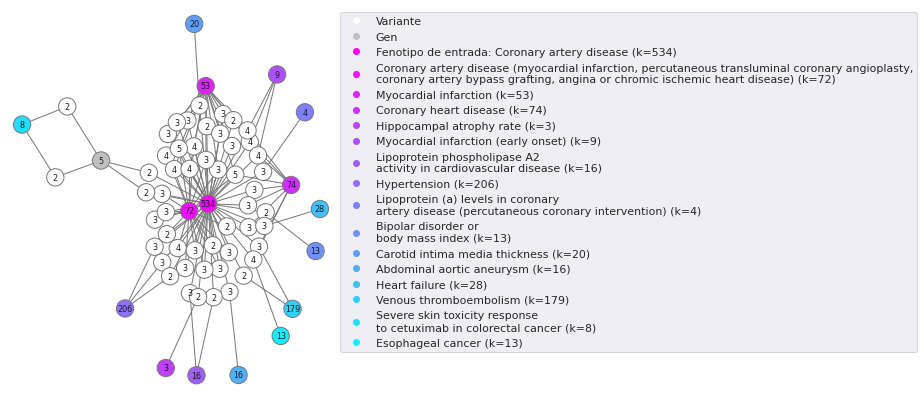

nodos_entrada  \
nodo_salida                                                                                                                                                                                           
Coronary artery disease (myocardial infarction, percutaneous transluminal coronary angioplasty, coronary artery bypass grafting, angina or chromic ischemic heart disease)  Coronary artery disease   
Myocardial infarction                                                                                                                                                       Coronary artery disease   
Coronary heart disease                                                                                                                                                      Coronary artery disease   
Hippocampal atrophy rate                                                                                                                                                    Coronary artery disease   
Myocardial infarction (early onset)                                                                                                                                         Coronary artery disease   
Lipoprotein phospholipase A2 activity in cardiovascular disease                                                                                                             Coronary artery disease   
Hypertension                                                                                                                                                                Coronary artery disease   
Lipoprotein (a) levels in coronary artery disease (percutaneous coronary intervention)                                                                                      Coronary artery disease   
Bipolar disorder or body mass index                                                                                                                                         Coronary artery disease   
Carotid intima media thickness                                                                                                                                              Coronary artery disease   
Abdominal aortic aneurysm                                                                                                                                                   Coronary artery disease   
Heart failure                                                                                                                                                               Coronary artery disease   
Venous thromboembolism                                                                                                                                                      Coronary artery disease   
Severe skin toxicity response to cetuximab in colorectal cancer                                                                                                             Coronary artery disease   
Esophageal cancer                                                                                                                                                           Coronary artery disease   

                                                                                                                                                                            prediccion  \
nodo_salida                                                                                                                                                                              
Coronary artery disease (myocardial infarction, percutaneous transluminal coronary angioplasty, coronary artery bypass grafting, angina or chromic ischemic heart disease)    0.014780   
Myocardial infarction                                                                                                                                                         0.014088   
Coronary heart disease                                

100%|██████████| 15/15 [00:00<00:00, 114.93it/s]



 -------------------------------------------------------------------------------- 


152 nodos a conservar


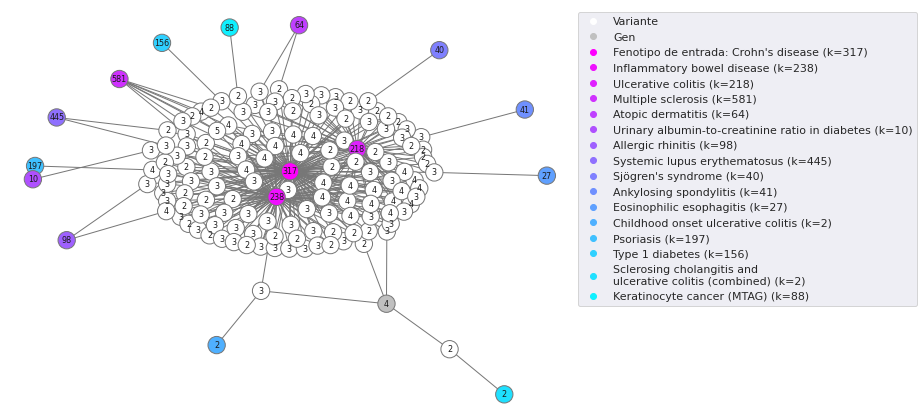

nodos_entrada  \
nodo_salida                                                                 
Inflammatory bowel disease                                Crohn's disease   
Ulcerative colitis                                        Crohn's disease   
Multiple sclerosis                                        Crohn's disease   
Atopic dermatitis                                         Crohn's disease   
Urinary albumin-to-creatinine ratio in diabetes           Crohn's disease   
Allergic rhinitis                                         Crohn's disease   
Systemic lupus erythematosus                              Crohn's disease   
Sjögren's syndrome                                        Crohn's disease   
Ankylosing spondylitis                                    Crohn's disease   
Eosinophilic esophagitis                                  Crohn's disease   
Childhood onset ulcerative colitis                        Crohn's disease   
Psoriasis                                                 Crohn's disease   
Type 1 diabetes                                           Crohn's disease   
Sclerosing cholangitis and ulcerative colitis (combined)  Crohn's disease   
Keratinocyte cancer (MTAG)                                Crohn's disease   

                                                          prediccion  \
nodo_salida                                                            
Inflammatory bowel disease                                  0.043383   
Ulcerative colitis                                          0.033737   
Multiple sclerosis                                          0.003646   
Atopic dermatitis                                           0.003074   
Urinary albumin-to-creatinine ratio in diabetes             0.002840   
Allergic rhinitis                                           0.001980   
Systemic lupus erythematosus                                0.001820   
Sjögren's syndrome                                          0.001820   
Ankylosing spondylitis                                      0.001667   
Eosinophilic esophagitis                                    0.001559   
Childhood onset ulcerative colitis                          0.001557   
Psoriasis                                                   0.001442   
Type 1 diabetes                                             0.001421   
Sclerosing cholangitis and ulcerative colitis (combined)    0.001329   
Keratinocyte cancer (MTAG)                                  0.001233   

                                                         tipo_de_nodo  \
nodo_salida                                                             
Inflammatory bowel disease                                   fenotipo   
Ulcerative colitis                                           fenotipo   
Multiple sclerosis                                           fenotipo   
Atopic dermatitis                                            fenotipo   
Urinary albumin-to-creatinine ratio in diabetes              fenotipo   
Allergic rhinitis                                            fenotipo   
Systemic lupus erythematosus                                 fenotipo   
Sjögren's syndrome                                           fenotipo   
Ankylosing spondylitis                                       fenotipo   
Eosinophilic esophagitis                                     fenotipo   
Childhood onset ulcerative colitis                           fenotipo   
Psoriasis                                                    fenotipo   
Type 1 diabetes                                              fenotipo   
Sclerosing cholangitis and ulcerative colitis (combined)     fenotipo   
Keratinocyte cancer (MTAG)                                   fenotipo   

                                                          es_fenotipo  \
nodo_salida                                                             
Inflammatory bowel disease                                       True   
Ulcerative colitis                                              

100%|██████████| 15/15 [00:00<00:00, 138.40it/s]



 -------------------------------------------------------------------------------- 


197 nodos a conservar


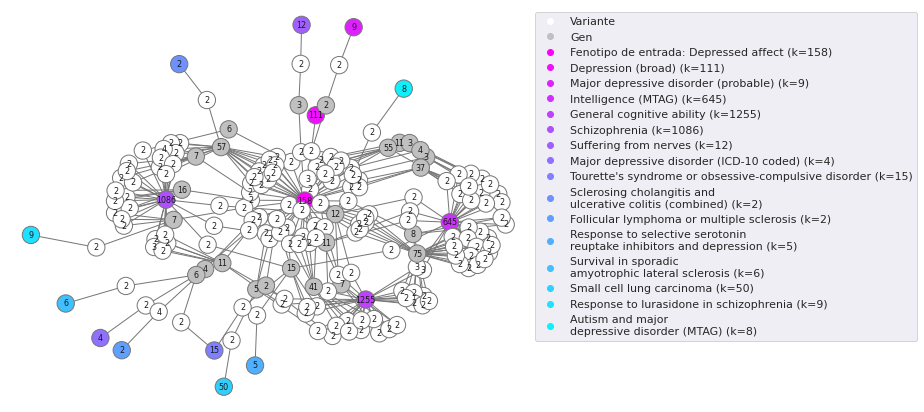

nodos_entrada  \
nodo_salida                                                                            
Depression (broad)                                                  Depressed affect   
Major depressive disorder (probable)                                Depressed affect   
Intelligence (MTAG)                                                 Depressed affect   
General cognitive ability                                           Depressed affect   
Schizophrenia                                                       Depressed affect   
Suffering from nerves                                               Depressed affect   
Major depressive disorder (ICD-10 coded)                            Depressed affect   
Tourette's syndrome or obsessive-compulsive disorder                Depressed affect   
Sclerosing cholangitis and ulcerative colitis (combined)            Depressed affect   
Follicular lymphoma or multiple sclerosis                           Depressed affect   
Response to selective serotonin reuptake inhibitors and depression  Depressed affect   
Survival in sporadic amyotrophic lateral sclerosis                  Depressed affect   
Small cell lung carcinoma                                           Depressed affect   
Response to lurasidone in schizophrenia                             Depressed affect   
Autism and major depressive disorder (MTAG)                         Depressed affect   

                                                                    prediccion  \
nodo_salida                                                                      
Depression (broad)                                                    0.002485   
Major depressive disorder (probable)                                  0.001596   
Intelligence (MTAG)                                                   0.001575   
General cognitive ability                                             0.001205   
Schizophrenia                                                         0.001022   
Suffering from nerves                                                 0.000784   
Major depressive disorder (ICD-10 coded)                              0.000770   
Tourette's syndrome or obsessive-compulsive disorder                  0.000725   
Sclerosing cholangitis and ulcerative colitis (combined)              0.000724   
Follicular lymphoma or multiple sclerosis                             0.000700   
Response to selective serotonin reuptake inhibitors and depression    0.000574   
Survival in sporadic amyotrophic lateral sclerosis                    0.000560   
Small cell lung carcinoma                                             0.000477   
Response to lurasidone in schizophrenia                               0.000470   
Autism and major depressive disorder (MTAG)                           0.000463   

                                                                   tipo_de_nodo  \
nodo_salida                                                                       
Depression (broad)                                                     fenotipo   
Major depressive disorder (probable)                                   fenotipo   
Intelligence (MTAG)                                                    fenotipo   
General cognitive ability                                              fenotipo   
Schizophrenia                                                          fenotipo   
Suffering from nerves                                                  fenotipo   
Major depressive disorder (ICD-10 coded)                               fenotipo   
Tourette's syndrome or obsessive-compulsive disorder                   fenotipo   
Sclerosing cholangitis and ulcerative colitis (combined)               fenotipo   
Follicular lymphoma or multiple sclerosis                              fenotipo   
Response to selective serotonin reuptake inhibitors and depression     fenotipo   
Survival in sporadic amyotrophic lateral sclerosis                     fenotipo   
Small cell lung c

100%|██████████| 15/15 [00:00<00:00, 197.85it/s]



 -------------------------------------------------------------------------------- 


64 nodos a conservar


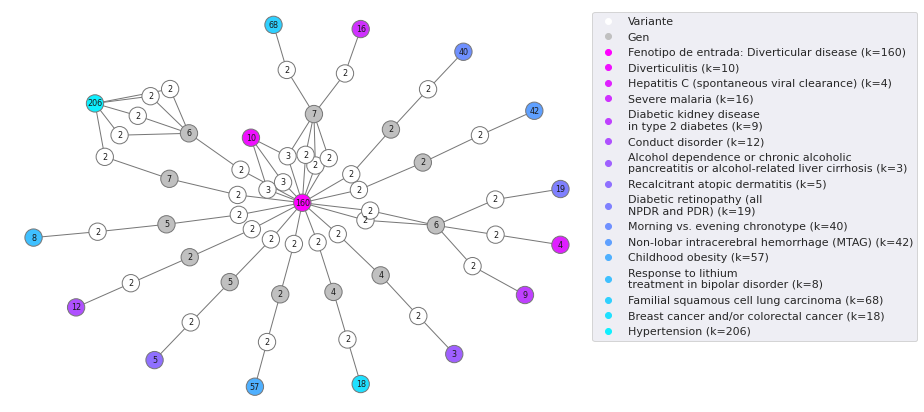

nodos_entrada  \
nodo_salida                                                                                                     
Diverticulitis                                                                           Diverticular disease   
Hepatitis C (spontaneous viral clearance)                                                Diverticular disease   
Severe malaria                                                                           Diverticular disease   
Diabetic kidney disease in type 2 diabetes                                               Diverticular disease   
Conduct disorder                                                                         Diverticular disease   
Alcohol dependence or chronic alcoholic pancreatitis or alcohol-related liver cirrhosis  Diverticular disease   
Recalcitrant atopic dermatitis                                                           Diverticular disease   
Diabetic retinopathy (all NPDR and PDR)                                                  Diverticular disease   
Morning vs. evening chronotype                                                           Diverticular disease   
Non-lobar intracerebral hemorrhage (MTAG)                                                Diverticular disease   
Childhood obesity                                                                        Diverticular disease   
Response to lithium treatment in bipolar disorder                                        Diverticular disease   
Familial squamous cell lung carcinoma                                                    Diverticular disease   
Breast cancer and/or colorectal cancer                                                   Diverticular disease   
Hypertension                                                                             Diverticular disease   

                                                                                         prediccion  \
nodo_salida                                                                                           
Diverticulitis                                                                             0.011857   
Hepatitis C (spontaneous viral clearance)                                                  0.001725   
Severe malaria                                                                             0.001263   
Diabetic kidney disease in type 2 diabetes                                                 0.001222   
Conduct disorder                                                                           0.001114   
Alcohol dependence or chronic alcoholic pancreatitis or alcohol-related liver cirrhosis    0.000845   
Recalcitrant atopic dermatitis                                                             0.000741   
Diabetic retinopathy (all NPDR and PDR)                                                    0.000732   
Morning vs. evening chronotype                                                             0.000714   
Non-lobar intracerebral hemorrhage (MTAG)                                                  0.000667   
Childhood obesity                                                                          0.000620   
Response to lithium treatment in bipolar disorder                                          0.000617   
Familial squamous cell lung carcinoma                                                      0.000591   
Breast cancer and/or colorectal cancer                                                     0.000562   
Hypertension                                                                               0.000551   

                                                                                        tipo_de_nodo  \
nodo_salida                                                                                            
Diverticulitis                                                                              fenotipo   
Hepatitis C (spontaneous viral clearance)                                                   fenotipo   
Severe

100%|██████████| 15/15 [00:00<00:00, 276.04it/s]



 -------------------------------------------------------------------------------- 


42 nodos a conservar


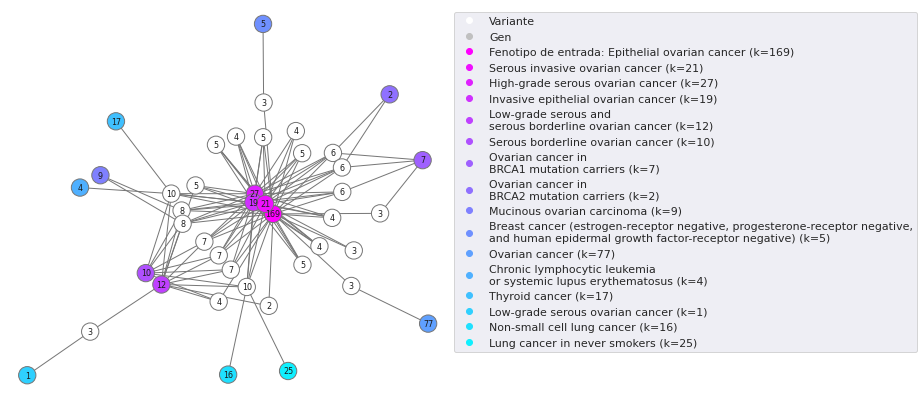

nodos_entrada  \
nodo_salida                                                                                                                                                  
Serous invasive ovarian cancer                                                                                                   Epithelial ovarian cancer   
High-grade serous ovarian cancer                                                                                                 Epithelial ovarian cancer   
Invasive epithelial ovarian cancer                                                                                               Epithelial ovarian cancer   
Low-grade serous and serous borderline ovarian cancer                                                                            Epithelial ovarian cancer   
Serous borderline ovarian cancer                                                                                                 Epithelial ovarian cancer   
Ovarian cancer in BRCA1 mutation carriers                                                                                        Epithelial ovarian cancer   
Ovarian cancer in BRCA2 mutation carriers                                                                                        Epithelial ovarian cancer   
Mucinous ovarian carcinoma                                                                                                       Epithelial ovarian cancer   
Breast cancer (estrogen-receptor negative, progesterone-receptor negative, and human epidermal growth factor-receptor negative)  Epithelial ovarian cancer   
Ovarian cancer                                                                                                                   Epithelial ovarian cancer   
Chronic lymphocytic leukemia or systemic lupus erythematosus                                                                     Epithelial ovarian cancer   
Thyroid cancer                                                                                                                   Epithelial ovarian cancer   
Low-grade serous ovarian cancer                                                                                                  Epithelial ovarian cancer   
Non-small cell lung cancer                                                                                                       Epithelial ovarian cancer   
Lung cancer in never smokers                                                                                                     Epithelial ovarian cancer   

                                                                                                                                 prediccion  \
nodo_salida                                                                                                                                   
Serous invasive ovarian cancer                                                                                                     0.025259   
High-grade serous ovarian cancer                                                                                                   0.024048   
Invasive epithelial ovarian cancer                                                                                                 0.021976   
Low-grade serous and serous borderline ovarian cancer                                                                              0.016425   
Serous borderline ovarian cancer                                                                                                   0.013061   
Ovarian cancer in BRCA1 mutation carriers                                                                                          0.012155   
Ovarian cancer in BRCA2 mutation carriers                                                                                          0.008205   
Mucinous ovarian carcinoma                                                                                                         0.005454   
Breast cancer (estrogen-

 33%|███▎      | 5/15 [00:00<00:00, 43.74it/s]



 -------------------------------------------------------------------------------- 




100%|██████████| 15/15 [00:00<00:00, 43.74it/s]


180 nodos a conservar


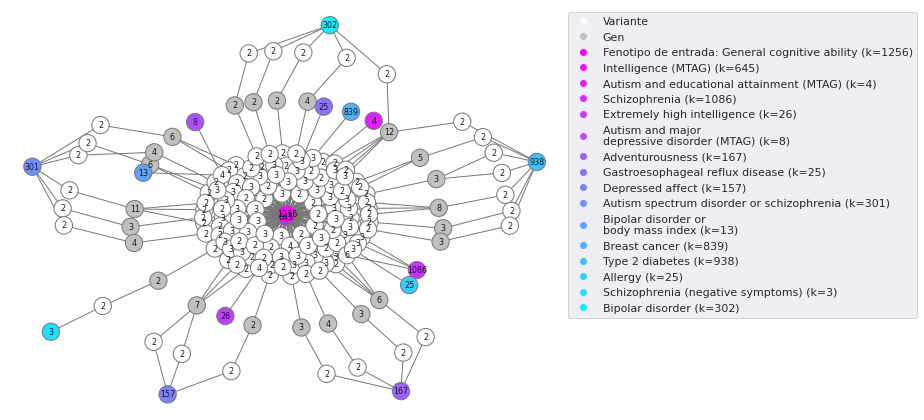

nodos_entrada  \
nodo_salida                                                              
Intelligence (MTAG)                          General cognitive ability   
Autism and educational attainment (MTAG)     General cognitive ability   
Schizophrenia                                General cognitive ability   
Extremely high intelligence                  General cognitive ability   
Autism and major depressive disorder (MTAG)  General cognitive ability   
Adventurousness                              General cognitive ability   
Gastroesophageal reflux disease              General cognitive ability   
Depressed affect                             General cognitive ability   
Autism spectrum disorder or schizophrenia    General cognitive ability   
Bipolar disorder or body mass index          General cognitive ability   
Breast cancer                                General cognitive ability   
Type 2 diabetes                              General cognitive ability   
Allergy                                      General cognitive ability   
Schizophrenia (negative symptoms)            General cognitive ability   
Bipolar disorder                             General cognitive ability   

                                             prediccion tipo_de_nodo  \
nodo_salida                                                            
Intelligence (MTAG)                            0.019431     fenotipo   
Autism and educational attainment (MTAG)       0.003208     fenotipo   
Schizophrenia                                  0.001881     fenotipo   
Extremely high intelligence                    0.001576     fenotipo   
Autism and major depressive disorder (MTAG)    0.001524     fenotipo   
Adventurousness                                0.001320     fenotipo   
Gastroesophageal reflux disease                0.001302     fenotipo   
Depressed affect                               0.001205     fenotipo   
Autism spectrum disorder or schizophrenia      0.001192     fenotipo   
Bipolar disorder or body mass index            0.001104     fenotipo   
Breast cancer                                  0.001050     fenotipo   
Type 2 diabetes                                0.000975     fenotipo   
Allergy                                        0.000930     fenotipo   
Schizophrenia (negative symptoms)              0.000848     fenotipo   
Bipolar disorder                               0.000783     fenotipo   

                                             es_fenotipo  \
nodo_salida                                                
Intelligence (MTAG)                                 True   
Autism and educational attainment (MTAG)            True   
Schizophrenia                                       True   
Extremely high intelligence                         True   
Autism and major depressive disorder (MTAG)         True   
Adventurousness                                     True   
Gastroesophageal reflux disease                     True   
Depressed affect                                    True   
Autism spectrum disorder or schizophrenia           True   
Bipolar disorder or body mass index                 True   
Breast cancer                                       True   
Type 2 diabetes                                     True   
Allergy                                             True   
Schizophrenia (negative symptoms)                   True   
Bipolar disorder                                    True   

                                                    categoria_fenotipo  \
nodo_salida                                                              
Intelligence (MTAG)                                    Neuro/Cogni/Emo   
Autism and educational attainment (MTAG)         Neurological disorder   
Schizophrenia                                    Neurological disorder   
Extremely high intelligence                            Neuro/Cogni/Emo   
Autism and major depressive disorder (MTAG)      Neurological disorder   
Adventurousness                   

100%|██████████| 15/15 [00:00<00:00, 129.21it/s]



 -------------------------------------------------------------------------------- 


66 nodos a conservar


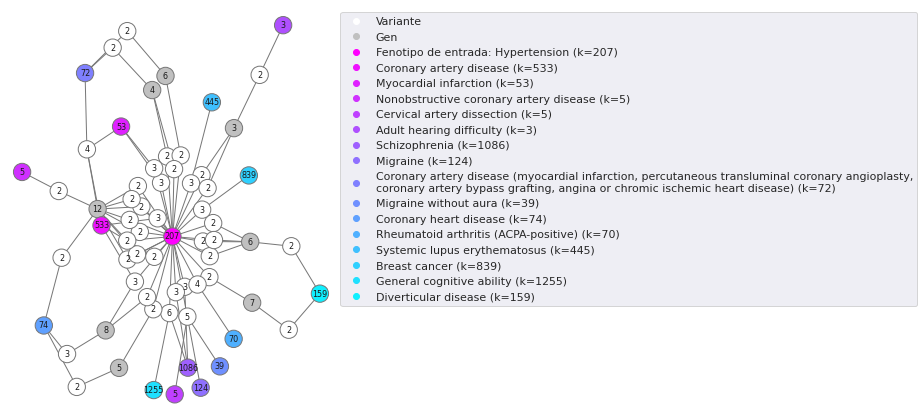

nodos_entrada  \
nodo_salida                                                                                                                                                                                
Coronary artery disease                                                                                                                                                     Hypertension   
Myocardial infarction                                                                                                                                                       Hypertension   
Nonobstructive coronary artery disease                                                                                                                                      Hypertension   
Cervical artery dissection                                                                                                                                                  Hypertension   
Adult hearing difficulty                                                                                                                                                    Hypertension   
Schizophrenia                                                                                                                                                               Hypertension   
Migraine                                                                                                                                                                    Hypertension   
Coronary artery disease (myocardial infarction, percutaneous transluminal coronary angioplasty, coronary artery bypass grafting, angina or chromic ischemic heart disease)  Hypertension   
Migraine without aura                                                                                                                                                       Hypertension   
Coronary heart disease                                                                                                                                                      Hypertension   
Rheumatoid arthritis (ACPA-positive)                                                                                                                                        Hypertension   
Systemic lupus erythematosus                                                                                                                                                Hypertension   
Breast cancer                                                                                                                                                               Hypertension   
General cognitive ability                                                                                                                                                   Hypertension   
Diverticular disease                                                                                                                                                        Hypertension   

                                                                                                                                                                            prediccion  \
nodo_salida                                                                                                                                                                              
Coronary artery disease                                                                                                                                                       0.003796   
Myocardial infarction                                                                                                                                                         0.002866   
Nonobstructive coronary artery disease                                                                                                                                        0.002335   
Cervical artery dissection                  

100%|██████████| 15/15 [00:00<00:00, 120.54it/s]



 -------------------------------------------------------------------------------- 


154 nodos a conservar


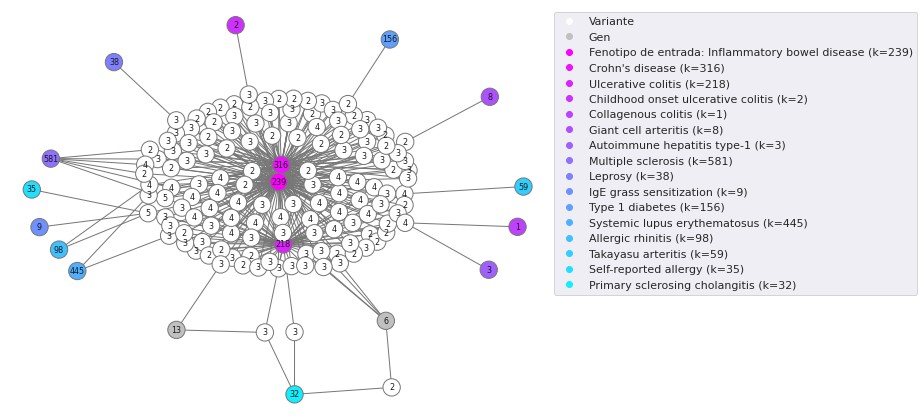

nodos_entrada  prediccion  \
nodo_salida                                                                  
Crohn's disease                     Inflammatory bowel disease    0.043387   
Ulcerative colitis                  Inflammatory bowel disease    0.038639   
Childhood onset ulcerative colitis  Inflammatory bowel disease    0.005246   
Collagenous colitis                 Inflammatory bowel disease    0.004808   
Giant cell arteritis                Inflammatory bowel disease    0.003984   
Autoimmune hepatitis type-1         Inflammatory bowel disease    0.003800   
Multiple sclerosis                  Inflammatory bowel disease    0.003217   
Leprosy                             Inflammatory bowel disease    0.002118   
IgE grass sensitization             Inflammatory bowel disease    0.001717   
Type 1 diabetes                     Inflammatory bowel disease    0.001671   
Systemic lupus erythematosus        Inflammatory bowel disease    0.001564   
Allergic rhinitis                   Inflammatory bowel disease    0.001555   
Takayasu arteritis                  Inflammatory bowel disease    0.001237   
Self-reported allergy               Inflammatory bowel disease    0.001233   
Primary sclerosing cholangitis      Inflammatory bowel disease    0.001103   

                                   tipo_de_nodo  es_fenotipo  \
nodo_salida                                                    
Crohn's disease                        fenotipo         True   
Ulcerative colitis                     fenotipo         True   
Childhood onset ulcerative colitis     fenotipo         True   
Collagenous colitis                    fenotipo         True   
Giant cell arteritis                   fenotipo         True   
Autoimmune hepatitis type-1            fenotipo         True   
Multiple sclerosis                     fenotipo         True   
Leprosy                                fenotipo         True   
IgE grass sensitization                fenotipo         True   
Type 1 diabetes                        fenotipo         True   
Systemic lupus erythematosus           fenotipo         True   
Allergic rhinitis                      fenotipo         True   
Takayasu arteritis                     fenotipo         True   
Self-reported allergy                  fenotipo         True   
Primary sclerosing cholangitis         fenotipo         True   

                                           categoria_fenotipo  \
nodo_salida                                                     
Crohn's disease                     Digestive system disorder   
Ulcerative colitis                     Immune system disorder   
Childhood onset ulcerative colitis     Immune system disorder   
Collagenous colitis                    Immune system disorder   
Giant cell arteritis                   Cardiovascular disease   
Autoimmune hepatitis type-1            Immune system disorder   
Multiple sclerosis                     Immune system disorder   
Leprosy                                 Neurological disorder   
IgE grass sensitization                Immune system disorder   
Type 1 diabetes                            Metabolic disorder   
Systemic lupus erythematosus           Immune system disorder   
Allergic rhinitis                      Immune system disorder   
Takayasu arteritis                     Cardiovascular disease   
Self-reported allergy                  Immune system disorder   
Primary sclerosing cholangitis      Digestive system disorder   

                                    prediccion_log10  k_nodo_entrada  \
nodo_salida                                                            
Crohn's disease                            -1.362642             238   
Ulcerative colitis                         -1.412972             238   
Childhood onset ulcerative colitis         -2.280148             238   
Collagenous colitis                        -2.318050             238   
Giant cell arteritis                       -2.399703             238   
Autoimmune hepatitis ty

 53%|█████▎    | 8/15 [00:00<00:00, 77.63it/s]



 -------------------------------------------------------------------------------- 




100%|██████████| 15/15 [00:00<00:00, 77.72it/s]


181 nodos a conservar


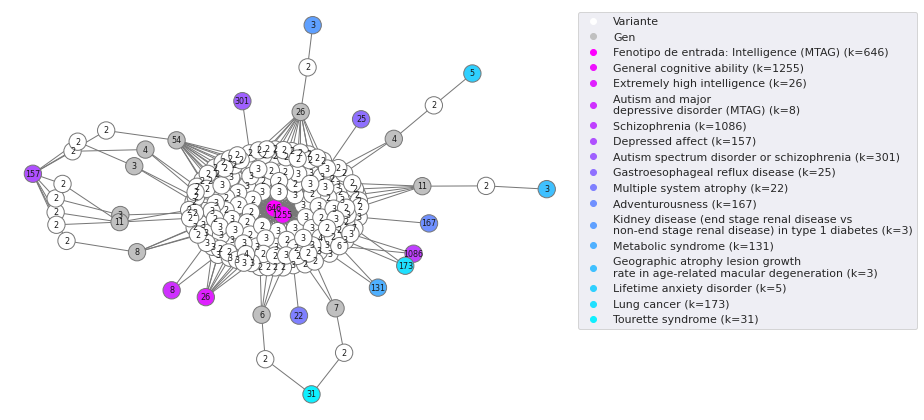

nodos_entrada  \
nodo_salida                                                                                                       
General cognitive ability                                                                   Intelligence (MTAG)   
Extremely high intelligence                                                                 Intelligence (MTAG)   
Autism and major depressive disorder (MTAG)                                                 Intelligence (MTAG)   
Schizophrenia                                                                               Intelligence (MTAG)   
Depressed affect                                                                            Intelligence (MTAG)   
Autism spectrum disorder or schizophrenia                                                   Intelligence (MTAG)   
Gastroesophageal reflux disease                                                             Intelligence (MTAG)   
Multiple system atrophy                                                                     Intelligence (MTAG)   
Adventurousness                                                                             Intelligence (MTAG)   
Kidney disease (end stage renal disease vs non-end stage renal disease) in type 1 diabetes  Intelligence (MTAG)   
Metabolic syndrome                                                                          Intelligence (MTAG)   
Geographic atrophy lesion growth rate in age-related macular degeneration                   Intelligence (MTAG)   
Lifetime anxiety disorder                                                                   Intelligence (MTAG)   
Lung cancer                                                                                 Intelligence (MTAG)   
Tourette syndrome                                                                           Intelligence (MTAG)   

                                                                                            prediccion  \
nodo_salida                                                                                              
General cognitive ability                                                                     0.019433   
Extremely high intelligence                                                                   0.010531   
Autism and major depressive disorder (MTAG)                                                   0.003925   
Schizophrenia                                                                                 0.001850   
Depressed affect                                                                              0.001576   
Autism spectrum disorder or schizophrenia                                                     0.001572   
Gastroesophageal reflux disease                                                               0.001507   
Multiple system atrophy                                                                       0.001426   
Adventurousness                                                                               0.001170   
Kidney disease (end stage renal disease vs non-end stage renal disease) in type 1 diabetes    0.001041   
Metabolic syndrome                                                                            0.001039   
Geographic atrophy lesion growth rate in age-related macular degeneration                     0.001023   
Lifetime anxiety disorder                                                                     0.001018   
Lung cancer                                                                                   0.000828   
Tourette syndrome                                                                             0.000777   

                                                                                           tipo_de_nodo  \
nodo_salida                                                                                               
General cognitive ability                                                                      fenotipo   
Extremely high int

100%|██████████| 15/15 [00:00<00:00, 299.55it/s]



 -------------------------------------------------------------------------------- 


58 nodos a conservar


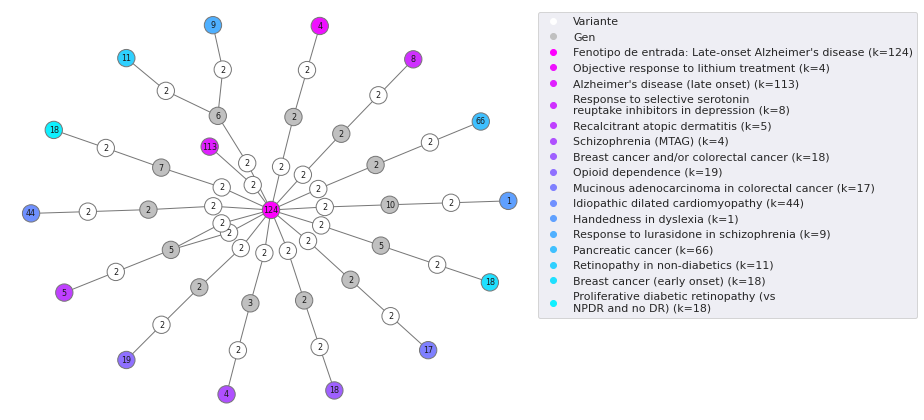

nodos_entrada  \
nodo_salida                                                                                         
Objective response to lithium treatment                            Late-onset Alzheimer's disease   
Alzheimer's disease (late onset)                                   Late-onset Alzheimer's disease   
Response to selective serotonin reuptake inhibitors in depression  Late-onset Alzheimer's disease   
Recalcitrant atopic dermatitis                                     Late-onset Alzheimer's disease   
Schizophrenia (MTAG)                                               Late-onset Alzheimer's disease   
Breast cancer and/or colorectal cancer                             Late-onset Alzheimer's disease   
Opioid dependence                                                  Late-onset Alzheimer's disease   
Mucinous adenocarcinoma in colorectal cancer                       Late-onset Alzheimer's disease   
Idiopathic dilated cardiomyopathy                                  Late-onset Alzheimer's disease   
Handedness in dyslexia                                             Late-onset Alzheimer's disease   
Response to lurasidone in schizophrenia                            Late-onset Alzheimer's disease   
Pancreatic cancer                                                  Late-onset Alzheimer's disease   
Retinopathy in non-diabetics                                       Late-onset Alzheimer's disease   
Breast cancer (early onset)                                        Late-onset Alzheimer's disease   
Proliferative diabetic retinopathy (vs NPDR and no DR)             Late-onset Alzheimer's disease   

                                                                   prediccion  \
nodo_salida                                                                     
Objective response to lithium treatment                              0.002420   
Alzheimer's disease (late onset)                                     0.002034   
Response to selective serotonin reuptake inhibitors in depression    0.001864   
Recalcitrant atopic dermatitis                                       0.001856   
Schizophrenia (MTAG)                                                 0.001608   
Breast cancer and/or colorectal cancer                               0.001404   
Opioid dependence                                                    0.001389   
Mucinous adenocarcinoma in colorectal cancer                         0.001284   
Idiopathic dilated cardiomyopathy                                    0.000885   
Handedness in dyslexia                                               0.000691   
Response to lurasidone in schizophrenia                              0.000686   
Pancreatic cancer                                                    0.000624   
Retinopathy in non-diabetics                                         0.000604   
Breast cancer (early onset)                                          0.000480   
Proliferative diabetic retinopathy (vs NPDR and no DR)               0.000406   

                                                                  tipo_de_nodo  \
nodo_salida                                                                      
Objective response to lithium treatment                               fenotipo   
Alzheimer's disease (late onset)                                      fenotipo   
Response to selective serotonin reuptake inhibitors in depression     fenotipo   
Recalcitrant atopic dermatitis                                        fenotipo   
Schizophrenia (MTAG)                                                  fenotipo   
Breast cancer and/or colorectal cancer                                fenotipo   
Opioid dependence                                                     fenotipo   
Mucinous adenocarcinoma in colorectal cancer                          fenotipo   
Idiopathic dilated cardiomyopathy                                     fenotipo   
Handedness in dyslexia                                                fenotipo   
Resp

100%|██████████| 15/15 [00:00<00:00, 155.90it/s]



 -------------------------------------------------------------------------------- 


89 nodos a conservar


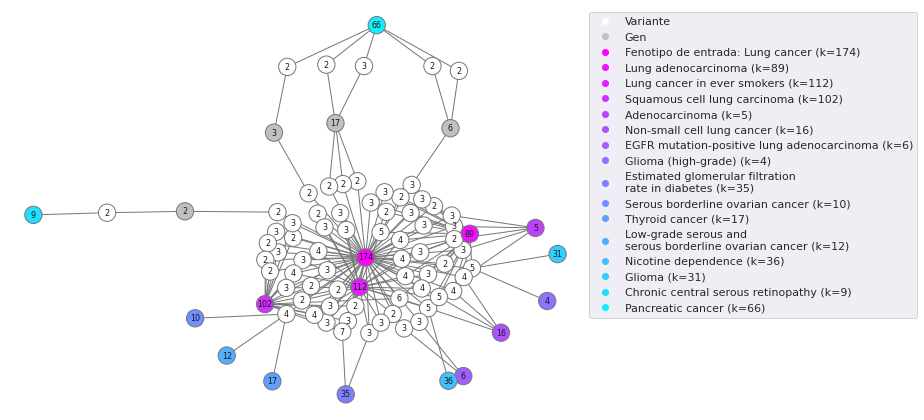

nodos_entrada  \
nodo_salida                                                           
Lung adenocarcinoma                                     Lung cancer   
Lung cancer in ever smokers                             Lung cancer   
Squamous cell lung carcinoma                            Lung cancer   
Adenocarcinoma                                          Lung cancer   
Non-small cell lung cancer                              Lung cancer   
EGFR mutation-positive lung adenocarcinoma              Lung cancer   
Glioma (high-grade)                                     Lung cancer   
Estimated glomerular filtration rate in diabetes        Lung cancer   
Serous borderline ovarian cancer                        Lung cancer   
Thyroid cancer                                          Lung cancer   
Low-grade serous and serous borderline ovarian cancer   Lung cancer   
Nicotine dependence                                     Lung cancer   
Glioma                                                  Lung cancer   
Chronic central serous retinopathy                      Lung cancer   
Pancreatic cancer                                       Lung cancer   

                                                       prediccion  \
nodo_salida                                                         
Lung adenocarcinoma                                      0.025219   
Lung cancer in ever smokers                              0.024708   
Squamous cell lung carcinoma                             0.022818   
Adenocarcinoma                                           0.018303   
Non-small cell lung cancer                               0.008206   
EGFR mutation-positive lung adenocarcinoma               0.007890   
Glioma (high-grade)                                      0.003096   
Estimated glomerular filtration rate in diabetes         0.003062   
Serous borderline ovarian cancer                         0.001903   
Thyroid cancer                                           0.001789   
Low-grade serous and serous borderline ovarian cancer    0.001755   
Nicotine dependence                                      0.001730   
Glioma                                                   0.001152   
Chronic central serous retinopathy                       0.001053   
Pancreatic cancer                                        0.000830   

                                                      tipo_de_nodo  \
nodo_salida                                                          
Lung adenocarcinoma                                       fenotipo   
Lung cancer in ever smokers                               fenotipo   
Squamous cell lung carcinoma                              fenotipo   
Adenocarcinoma                                            fenotipo   
Non-small cell lung cancer                                fenotipo   
EGFR mutation-positive lung adenocarcinoma                fenotipo   
Glioma (high-grade)                                       fenotipo   
Estimated glomerular filtration rate in diabetes          fenotipo   
Serous borderline ovarian cancer                          fenotipo   
Thyroid cancer                                            fenotipo   
Low-grade serous and serous borderline ovarian cancer     fenotipo   
Nicotine dependence                                       fenotipo   
Glioma                                                    fenotipo   
Chronic central serous retinopathy                        fenotipo   
Pancreatic cancer                                         fenotipo   

                                                       es_fenotipo  \
nodo_salida                                                          
Lung adenocarcinoma                                           True   
Lung cancer in ever smokers                                   True   
Squamous cell lung carcinoma                                  True   
Adenocarcinoma                                                True   
Non-small cell lung cancer                                   

100%|██████████| 15/15 [00:00<00:00, 164.85it/s]



 -------------------------------------------------------------------------------- 


69 nodos a conservar


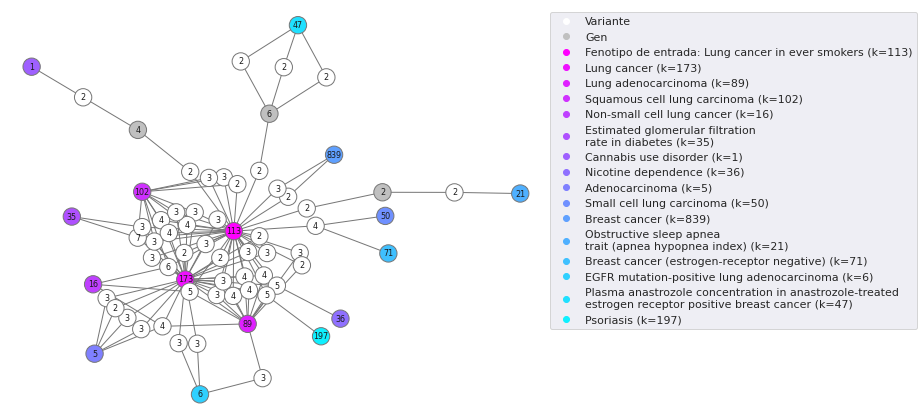

nodos_entrada  \
nodo_salida                                                                                                                     
Lung cancer                                                                                       Lung cancer in ever smokers   
Lung adenocarcinoma                                                                               Lung cancer in ever smokers   
Squamous cell lung carcinoma                                                                      Lung cancer in ever smokers   
Non-small cell lung cancer                                                                        Lung cancer in ever smokers   
Estimated glomerular filtration rate in diabetes                                                  Lung cancer in ever smokers   
Cannabis use disorder                                                                             Lung cancer in ever smokers   
Nicotine dependence                                                                               Lung cancer in ever smokers   
Adenocarcinoma                                                                                    Lung cancer in ever smokers   
Small cell lung carcinoma                                                                         Lung cancer in ever smokers   
Breast cancer                                                                                     Lung cancer in ever smokers   
Obstructive sleep apnea trait (apnea hypopnea index)                                              Lung cancer in ever smokers   
Breast cancer (estrogen-receptor negative)                                                        Lung cancer in ever smokers   
EGFR mutation-positive lung adenocarcinoma                                                        Lung cancer in ever smokers   
Plasma anastrozole concentration in anastrozole-treated estrogen receptor positive breast cancer  Lung cancer in ever smokers   
Psoriasis                                                                                         Lung cancer in ever smokers   

                                                                                                  prediccion  \
nodo_salida                                                                                                    
Lung cancer                                                                                         0.024703   
Lung adenocarcinoma                                                                                 0.014796   
Squamous cell lung carcinoma                                                                        0.013882   
Non-small cell lung cancer                                                                          0.004413   
Estimated glomerular filtration rate in diabetes                                                    0.003647   
Cannabis use disorder                                                                               0.001917   
Nicotine dependence                                                                                 0.001537   
Adenocarcinoma                                                                                      0.001525   
Small cell lung carcinoma                                                                           0.001505   
Breast cancer                                                                                       0.001440   
Obstructive sleep apnea trait (apnea hypopnea index)                                                0.001110   
Breast cancer (estrogen-receptor negative)                                                          0.001037   
EGFR mutation-positive lung adenocarcinoma                                                          0.000768   
Plasma anastrozole concentration in anastrozole-treated estrogen receptor positive breast cancer    0.000764   
Psoriasis                                                                                           0.000715   

             

100%|██████████| 15/15 [00:00<00:00, 197.61it/s]



 -------------------------------------------------------------------------------- 


66 nodos a conservar


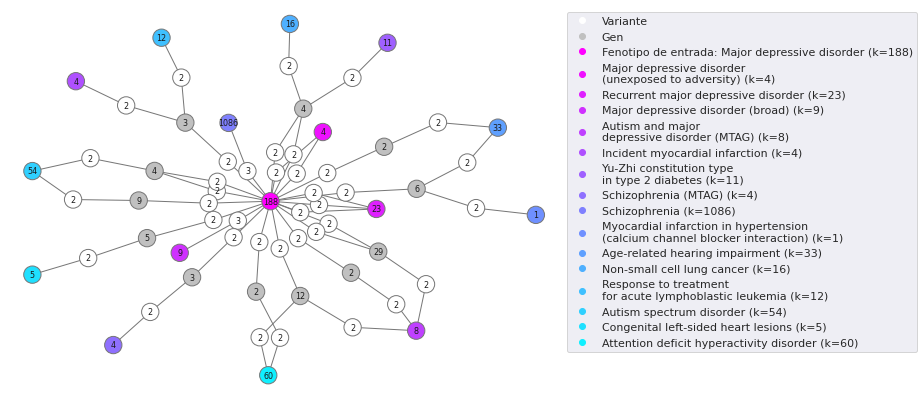

nodos_entrada  \
nodo_salida                                                                                              
Major depressive disorder (unexposed to adversity)                           Major depressive disorder   
Recurrent major depressive disorder                                          Major depressive disorder   
Major depressive disorder (broad)                                            Major depressive disorder   
Autism and major depressive disorder (MTAG)                                  Major depressive disorder   
Incident myocardial infarction                                               Major depressive disorder   
Yu-Zhi constitution type in type 2 diabetes                                  Major depressive disorder   
Schizophrenia (MTAG)                                                         Major depressive disorder   
Schizophrenia                                                                Major depressive disorder   
Myocardial infarction in hypertension (calcium channel blocker interaction)  Major depressive disorder   
Age-related hearing impairment                                               Major depressive disorder   
Non-small cell lung cancer                                                   Major depressive disorder   
Response to treatment for acute lymphoblastic leukemia                       Major depressive disorder   
Autism spectrum disorder                                                     Major depressive disorder   
Congenital left-sided heart lesions                                          Major depressive disorder   
Attention deficit hyperactivity disorder                                     Major depressive disorder   

                                                                             prediccion  \
nodo_salida                                                                               
Major depressive disorder (unexposed to adversity)                             0.015697   
Recurrent major depressive disorder                                            0.011522   
Major depressive disorder (broad)                                              0.003818   
Autism and major depressive disorder (MTAG)                                    0.001577   
Incident myocardial infarction                                                 0.001482   
Yu-Zhi constitution type in type 2 diabetes                                    0.001431   
Schizophrenia (MTAG)                                                           0.001262   
Schizophrenia                                                                  0.001160   
Myocardial infarction in hypertension (calcium channel blocker interaction)    0.001127   
Age-related hearing impairment                                                 0.000998   
Non-small cell lung cancer                                                     0.000932   
Response to treatment for acute lymphoblastic leukemia                         0.000884   
Autism spectrum disorder                                                       0.000717   
Congenital left-sided heart lesions                                            0.000707   
Attention deficit hyperactivity disorder                                       0.000689   

                                                                            tipo_de_nodo  \
nodo_salida                                                                                
Major depressive disorder (unexposed to adversity)                              fenotipo   
Recurrent major depressive disorder                                             fenotipo   
Major depressive disorder (broad)                                               fenotipo   
Autism and major depressive disorder (MTAG)                                     fenotipo   
Incident myocardial infarction                                                  fenotipo   
Yu-Zhi constitution type in type 2 diabetes                                     fenotipo   
Sc

100%|██████████| 15/15 [00:00<00:00, 203.82it/s]



 -------------------------------------------------------------------------------- 


44 nodos a conservar


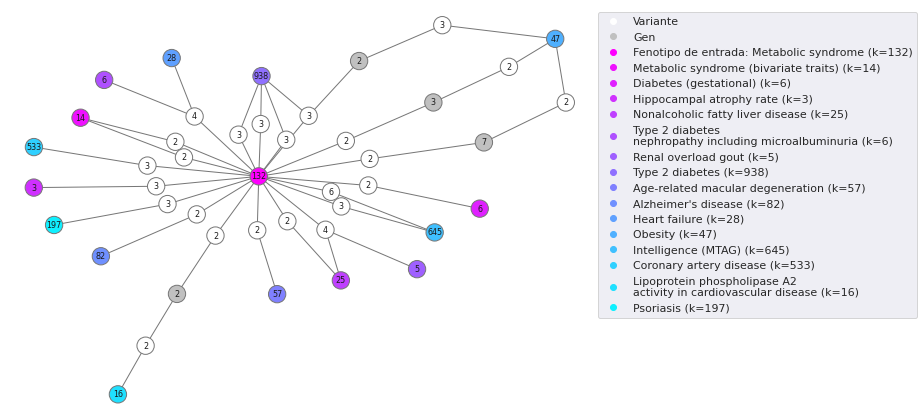

nodos_entrada  \
nodo_salida                                                                           
Metabolic syndrome (bivariate traits)                            Metabolic syndrome   
Diabetes (gestational)                                           Metabolic syndrome   
Hippocampal atrophy rate                                         Metabolic syndrome   
Nonalcoholic fatty liver disease                                 Metabolic syndrome   
Type 2 diabetes nephropathy including microalbuminuria           Metabolic syndrome   
Renal overload gout                                              Metabolic syndrome   
Type 2 diabetes                                                  Metabolic syndrome   
Age-related macular degeneration                                 Metabolic syndrome   
Alzheimer's disease                                              Metabolic syndrome   
Heart failure                                                    Metabolic syndrome   
Obesity                                                          Metabolic syndrome   
Intelligence (MTAG)                                              Metabolic syndrome   
Coronary artery disease                                          Metabolic syndrome   
Lipoprotein phospholipase A2 activity in cardiovascular disease  Metabolic syndrome   
Psoriasis                                                        Metabolic syndrome   

                                                                 prediccion  \
nodo_salida                                                                   
Metabolic syndrome (bivariate traits)                              0.009494   
Diabetes (gestational)                                             0.007805   
Hippocampal atrophy rate                                           0.006278   
Nonalcoholic fatty liver disease                                   0.005960   
Type 2 diabetes nephropathy including microalbuminuria             0.003495   
Renal overload gout                                                0.003191   
Type 2 diabetes                                                    0.002963   
Age-related macular degeneration                                   0.002381   
Alzheimer's disease                                                0.002138   
Heart failure                                                      0.002010   
Obesity                                                            0.001132   
Intelligence (MTAG)                                                0.001039   
Coronary artery disease                                            0.000993   
Lipoprotein phospholipase A2 activity in cardiovascular disease    0.000971   
Psoriasis                                                          0.000923   

                                                                tipo_de_nodo  \
nodo_salida                                                                    
Metabolic syndrome (bivariate traits)                               fenotipo   
Diabetes (gestational)                                              fenotipo   
Hippocampal atrophy rate                                            fenotipo   
Nonalcoholic fatty liver disease                                    fenotipo   
Type 2 diabetes nephropathy including microalbuminuria              fenotipo   
Renal overload gout                                                 fenotipo   
Type 2 diabetes                                                     fenotipo   
Age-related macular degeneration                                    fenotipo   
Alzheimer's disease                                                 fenotipo   
Heart failure                                                       fenotipo   
Obesity                                                             fenotipo   
Intelligence (MTAG)                                                 fenotipo   
Coronary artery disease                                             fenotipo   
Lipoprotein phospholipase A2 activity in cardi

100%|██████████| 15/15 [00:00<00:00, 233.81it/s]



 -------------------------------------------------------------------------------- 


82 nodos a conservar


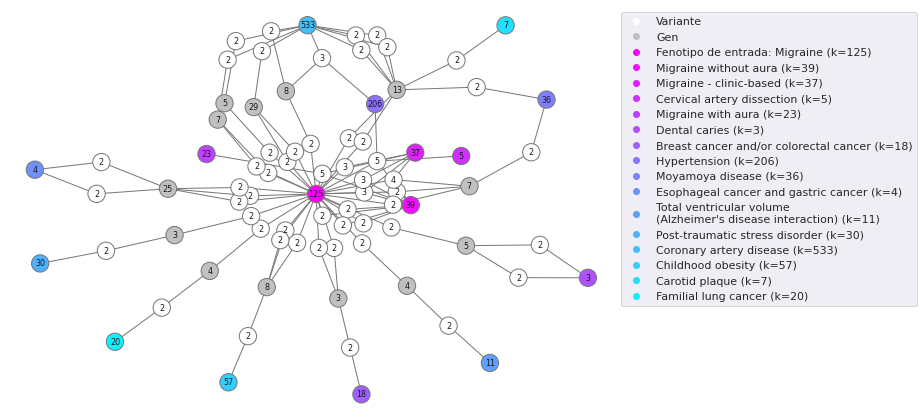

nodos_entrada  \
nodo_salida                                                                
Migraine without aura                                           Migraine   
Migraine - clinic-based                                         Migraine   
Cervical artery dissection                                      Migraine   
Migraine with aura                                              Migraine   
Dental caries                                                   Migraine   
Breast cancer and/or colorectal cancer                          Migraine   
Hypertension                                                    Migraine   
Moyamoya disease                                                Migraine   
Esophageal cancer and gastric cancer                            Migraine   
Total ventricular volume (Alzheimer's disease interaction)      Migraine   
Post-traumatic stress disorder                                  Migraine   
Coronary artery disease                                         Migraine   
Childhood obesity                                               Migraine   
Carotid plaque                                                  Migraine   
Familial lung cancer                                            Migraine   

                                                            prediccion  \
nodo_salida                                                              
Migraine without aura                                         0.020766   
Migraine - clinic-based                                       0.010512   
Cervical artery dissection                                    0.003752   
Migraine with aura                                            0.002879   
Dental caries                                                 0.001867   
Breast cancer and/or colorectal cancer                        0.001706   
Hypertension                                                  0.001150   
Moyamoya disease                                              0.000799   
Esophageal cancer and gastric cancer                          0.000706   
Total ventricular volume (Alzheimer's disease interaction)    0.000656   
Post-traumatic stress disorder                                0.000601   
Coronary artery disease                                       0.000591   
Childhood obesity                                             0.000576   
Carotid plaque                                                0.000571   
Familial lung cancer                                          0.000562   

                                                           tipo_de_nodo  \
nodo_salida                                                               
Migraine without aura                                          fenotipo   
Migraine - clinic-based                                        fenotipo   
Cervical artery dissection                                     fenotipo   
Migraine with aura                                             fenotipo   
Dental caries                                                  fenotipo   
Breast cancer and/or colorectal cancer                         fenotipo   
Hypertension                                                   fenotipo   
Moyamoya disease                                               fenotipo   
Esophageal cancer and gastric cancer                           fenotipo   
Total ventricular volume (Alzheimer's disease interaction)     fenotipo   
Post-traumatic stress disorder                                 fenotipo   
Coronary artery disease                                        fenotipo   
Childhood obesity                                              fenotipo   
Carotid plaque                                                 fenotipo   
Familial lung cancer                                           fenotipo   

                                                            es_fenotipo  \
nodo_salida                                                               
Migraine without aura                                              True   
Migrai

100%|██████████| 15/15 [00:00<00:00, 115.89it/s]



 -------------------------------------------------------------------------------- 


44 nodos a conservar


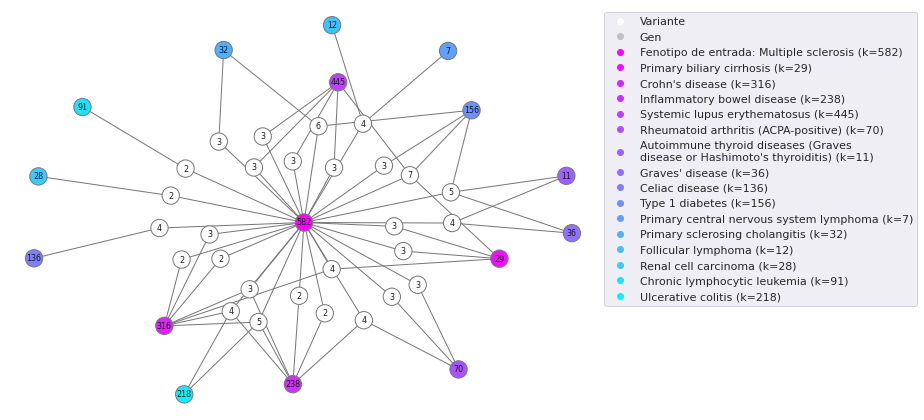

nodos_entrada  \
nodo_salida                                                                                   
Primary biliary cirrhosis                                                Multiple sclerosis   
Crohn's disease                                                          Multiple sclerosis   
Inflammatory bowel disease                                               Multiple sclerosis   
Systemic lupus erythematosus                                             Multiple sclerosis   
Rheumatoid arthritis (ACPA-positive)                                     Multiple sclerosis   
Autoimmune thyroid diseases (Graves disease or Hashimoto's thyroiditis)  Multiple sclerosis   
Graves' disease                                                          Multiple sclerosis   
Celiac disease                                                           Multiple sclerosis   
Type 1 diabetes                                                          Multiple sclerosis   
Primary central nervous system lymphoma                                  Multiple sclerosis   
Primary sclerosing cholangitis                                           Multiple sclerosis   
Follicular lymphoma                                                      Multiple sclerosis   
Renal cell carcinoma                                                     Multiple sclerosis   
Chronic lymphocytic leukemia                                             Multiple sclerosis   
Ulcerative colitis                                                       Multiple sclerosis   

                                                                         prediccion  \
nodo_salida                                                                           
Primary biliary cirrhosis                                                  0.004043   
Crohn's disease                                                            0.003647   
Inflammatory bowel disease                                                 0.003217   
Systemic lupus erythematosus                                               0.002625   
Rheumatoid arthritis (ACPA-positive)                                       0.002437   
Autoimmune thyroid diseases (Graves disease or Hashimoto's thyroiditis)    0.002333   
Graves' disease                                                            0.002163   
Celiac disease                                                             0.002151   
Type 1 diabetes                                                            0.002100   
Primary central nervous system lymphoma                                    0.002097   
Primary sclerosing cholangitis                                             0.002049   
Follicular lymphoma                                                        0.001713   
Renal cell carcinoma                                                       0.001635   
Chronic lymphocytic leukemia                                               0.001605   
Ulcerative colitis                                                         0.001561   

                                                                        tipo_de_nodo  \
nodo_salida                                                                            
Primary biliary cirrhosis                                                   fenotipo   
Crohn's disease                                                             fenotipo   
Inflammatory bowel disease                                                  fenotipo   
Systemic lupus erythematosus                                                fenotipo   
Rheumatoid arthritis (ACPA-positive)                                        fenotipo   
Autoimmune thyroid diseases (Graves disease or Hashimoto's thyroiditis)     fenotipo   
Graves' disease                                                             fenotipo   
Celiac disease                                                              fenotipo   
Type 1 diabetes                                                             fenotipo   
Primary centra

100%|██████████| 15/15 [00:00<00:00, 203.77it/s]



 -------------------------------------------------------------------------------- 


63 nodos a conservar


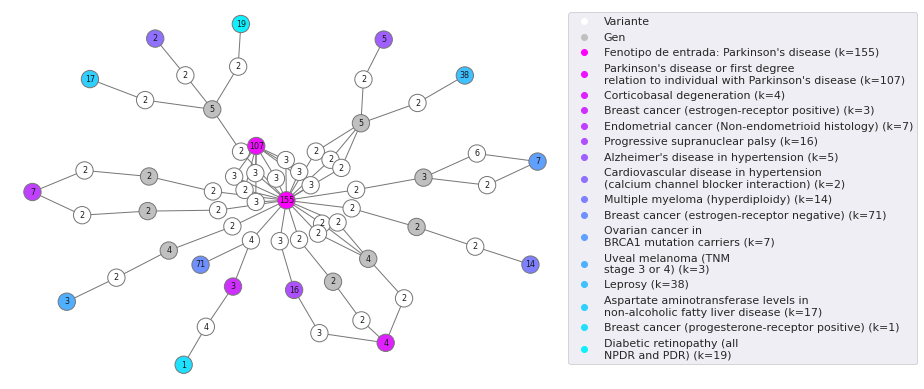

nodos_entrada  \
nodo_salida                                                                                                
Parkinson's disease or first degree relation to individual with Parkinson's disease  Parkinson's disease   
Corticobasal degeneration                                                            Parkinson's disease   
Breast cancer (estrogen-receptor positive)                                           Parkinson's disease   
Endometrial cancer (Non-endometrioid histology)                                      Parkinson's disease   
Progressive supranuclear palsy                                                       Parkinson's disease   
Alzheimer's disease in hypertension                                                  Parkinson's disease   
Cardiovascular disease in hypertension (calcium channel blocker interaction)         Parkinson's disease   
Multiple myeloma (hyperdiploidy)                                                     Parkinson's disease   
Breast cancer (estrogen-receptor negative)                                           Parkinson's disease   
Ovarian cancer in BRCA1 mutation carriers                                            Parkinson's disease   
Uveal melanoma (TNM stage 3 or 4)                                                    Parkinson's disease   
Leprosy                                                                              Parkinson's disease   
Aspartate aminotransferase levels in non-alcoholic fatty liver disease               Parkinson's disease   
Breast cancer (progesterone-receptor positive)                                       Parkinson's disease   
Diabetic retinopathy (all NPDR and PDR)                                              Parkinson's disease   

                                                                                     prediccion  \
nodo_salida                                                                                       
Parkinson's disease or first degree relation to individual with Parkinson's disease    0.012223   
Corticobasal degeneration                                                              0.004679   
Breast cancer (estrogen-receptor positive)                                             0.004364   
Endometrial cancer (Non-endometrioid histology)                                        0.003682   
Progressive supranuclear palsy                                                         0.002959   
Alzheimer's disease in hypertension                                                    0.002163   
Cardiovascular disease in hypertension (calcium channel blocker interaction)           0.001305   
Multiple myeloma (hyperdiploidy)                                                       0.001043   
Breast cancer (estrogen-receptor negative)                                             0.001017   
Ovarian cancer in BRCA1 mutation carriers                                              0.000986   
Uveal melanoma (TNM stage 3 or 4)                                                      0.000967   
Leprosy                                                                                0.000918   
Aspartate aminotransferase levels in non-alcoholic fatty liver disease                 0.000488   
Breast cancer (progesterone-receptor positive)                                         0.000485   
Diabetic retinopathy (all NPDR and PDR)                                                0.000465   

                                                                                    tipo_de_nodo  \
nodo_salida                                                                                        
Parkinson's disease or first degree relation to individual with Parkinson's disease     fenotipo   
Corticobasal degeneration                                                               fenotipo   
Breast cancer (estrogen-receptor positive)                                              fenotipo   
Endometrial cancer (Non-endometrioid histology)                       

100%|██████████| 15/15 [00:00<00:00, 166.45it/s]



 -------------------------------------------------------------------------------- 


108 nodos a conservar


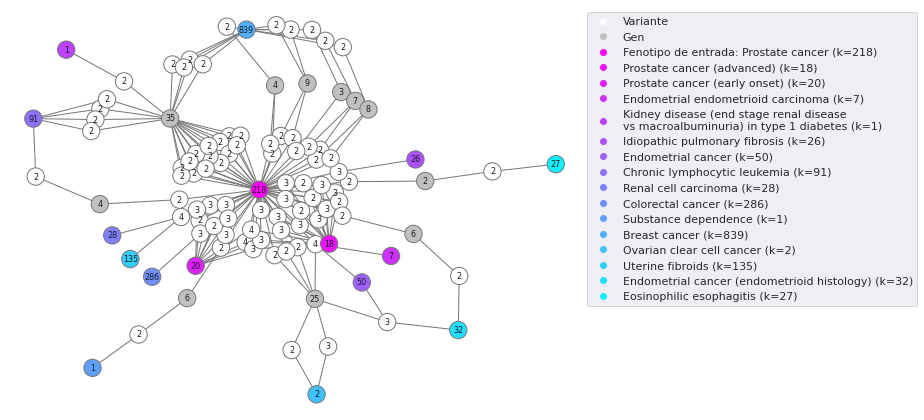

nodos_entrada  \
nodo_salida                                                                                        
Prostate cancer (advanced)                                                       Prostate cancer   
Prostate cancer (early onset)                                                    Prostate cancer   
Endometrial endometrioid carcinoma                                               Prostate cancer   
Kidney disease (end stage renal disease vs macroalbuminuria) in type 1 diabetes  Prostate cancer   
Idiopathic pulmonary fibrosis                                                    Prostate cancer   
Endometrial cancer                                                               Prostate cancer   
Chronic lymphocytic leukemia                                                     Prostate cancer   
Renal cell carcinoma                                                             Prostate cancer   
Colorectal cancer                                                                Prostate cancer   
Substance dependence                                                             Prostate cancer   
Breast cancer                                                                    Prostate cancer   
Ovarian clear cell cancer                                                        Prostate cancer   
Uterine fibroids                                                                 Prostate cancer   
Endometrial cancer (endometrioid histology)                                      Prostate cancer   
Eosinophilic esophagitis                                                         Prostate cancer   

                                                                                 prediccion  \
nodo_salida                                                                                   
Prostate cancer (advanced)                                                         0.035355   
Prostate cancer (early onset)                                                      0.025274   
Endometrial endometrioid carcinoma                                                 0.002330   
Kidney disease (end stage renal disease vs macroalbuminuria) in type 1 diabetes    0.002324   
Idiopathic pulmonary fibrosis                                                      0.001751   
Endometrial cancer                                                                 0.001580   
Chronic lymphocytic leukemia                                                       0.001546   
Renal cell carcinoma                                                               0.001374   
Colorectal cancer                                                                  0.001258   
Substance dependence                                                               0.001102   
Breast cancer                                                                      0.000994   
Ovarian clear cell cancer                                                          0.000909   
Uterine fibroids                                                                   0.000775   
Endometrial cancer (endometrioid histology)                                        0.000722   
Eosinophilic esophagitis                                                           0.000713   

                                                                                tipo_de_nodo  \
nodo_salida                                                                                    
Prostate cancer (advanced)                                                          fenotipo   
Prostate cancer (early onset)                                                       fenotipo   
Endometrial endometrioid carcinoma                                                  fenotipo   
Kidney disease (end stage renal disease vs macroalbuminuria) in type 1 diabetes     fenotipo   
Idiopathic pulmonary fibrosis                                                       fenotipo   
Endometrial cancer                                                                  fenotipo  

100%|██████████| 15/15 [00:00<00:00, 218.96it/s]



 -------------------------------------------------------------------------------- 


63 nodos a conservar


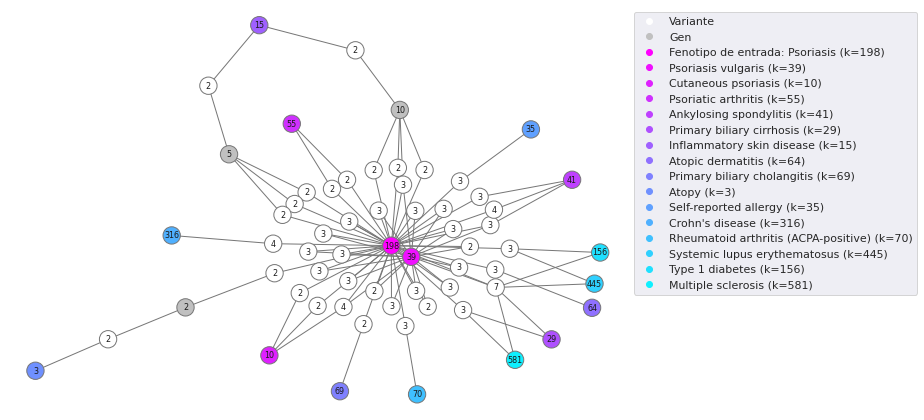

nodos_entrada  prediccion tipo_de_nodo  \
nodo_salida                                                                   
Psoriasis vulgaris                       Psoriasis    0.030975     fenotipo   
Cutaneous psoriasis                      Psoriasis    0.012417     fenotipo   
Psoriatic arthritis                      Psoriasis    0.007200     fenotipo   
Ankylosing spondylitis                   Psoriasis    0.005736     fenotipo   
Primary biliary cirrhosis                Psoriasis    0.002949     fenotipo   
Inflammatory skin disease                Psoriasis    0.002257     fenotipo   
Atopic dermatitis                        Psoriasis    0.001993     fenotipo   
Primary biliary cholangitis              Psoriasis    0.001948     fenotipo   
Atopy                                    Psoriasis    0.001921     fenotipo   
Self-reported allergy                    Psoriasis    0.001917     fenotipo   
Crohn's disease                          Psoriasis    0.001443     fenotipo   
Rheumatoid arthritis (ACPA-positive)     Psoriasis    0.001362     fenotipo   
Systemic lupus erythematosus             Psoriasis    0.001347     fenotipo   
Type 1 diabetes                          Psoriasis    0.001335     fenotipo   
Multiple sclerosis                       Psoriasis    0.001286     fenotipo   

                                      es_fenotipo         categoria_fenotipo  \
nodo_salida                                                                    
Psoriasis vulgaris                           True     Immune system disorder   
Cutaneous psoriasis                          True     Immune system disorder   
Psoriatic arthritis                          True     Immune system disorder   
Ankylosing spondylitis                       True     Immune system disorder   
Primary biliary cirrhosis                    True                     Cancer   
Inflammatory skin disease                    True     Immune system disorder   
Atopic dermatitis                            True     Immune system disorder   
Primary biliary cholangitis                  True                     Cancer   
Atopy                                        True     Immune system disorder   
Self-reported allergy                        True     Immune system disorder   
Crohn's disease                              True  Digestive system disorder   
Rheumatoid arthritis (ACPA-positive)         True     Immune system disorder   
Systemic lupus erythematosus                 True     Immune system disorder   
Type 1 diabetes                              True         Metabolic disorder   
Multiple sclerosis                           True     Immune system disorder   

                                      prediccion_log10  k_nodo_entrada  \
nodo_salida                                                              
Psoriasis vulgaris                           -1.508995             197   
Cutaneous psoriasis                          -1.905995             197   
Psoriatic arthritis                          -2.142655             197   
Ankylosing spondylitis                       -2.241420             197   
Primary biliary cirrhosis                    -2.530382             197   
Inflammatory skin disease                    -2.646374             197   
Atopic dermatitis                            -2.700465             197   
Primary biliary cholangitis                  -2.710482             197   
Atopy                                        -2.716394             197   
Self-reported allergy                        -2.717332             197   
Crohn's disease                              -2.840824             197   
Rheumatoid arthritis (ACPA-positive)         -2.865712             197   
Systemic lupus erythematosus                 -2.870756             197   
Type 1 diabetes                              -2.874537             197   
Multiple sclerosis                           -2.890843             197   

                                      k_nodo_salida  pred_rank    color  

100%|██████████| 15/15 [00:00<00:00, 390.94it/s]



 -------------------------------------------------------------------------------- 


61 nodos a conservar


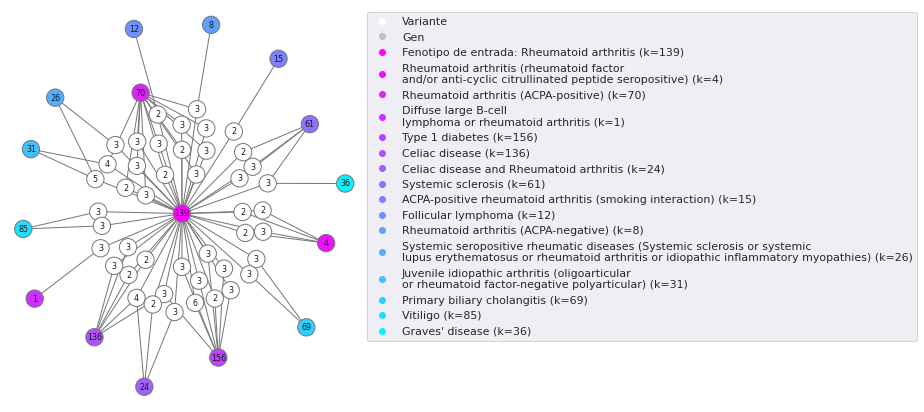

nodos_entrada  \
nodo_salida                                                                                                                                                                         
Rheumatoid arthritis (rheumatoid factor and/or anti-cyclic citrullinated peptide seropositive)                                                               Rheumatoid arthritis   
Rheumatoid arthritis (ACPA-positive)                                                                                                                         Rheumatoid arthritis   
Diffuse large B-cell lymphoma or rheumatoid arthritis                                                                                                        Rheumatoid arthritis   
Type 1 diabetes                                                                                                                                              Rheumatoid arthritis   
Celiac disease                                                                                                                                               Rheumatoid arthritis   
Celiac disease and Rheumatoid arthritis                                                                                                                      Rheumatoid arthritis   
Systemic sclerosis                                                                                                                                           Rheumatoid arthritis   
ACPA-positive rheumatoid arthritis (smoking interaction)                                                                                                     Rheumatoid arthritis   
Follicular lymphoma                                                                                                                                          Rheumatoid arthritis   
Rheumatoid arthritis (ACPA-negative)                                                                                                                         Rheumatoid arthritis   
Systemic seropositive rheumatic diseases (Systemic sclerosis or systemic lupus erythematosus or rheumatoid arthritis or idiopathic inflammatory myopathies)  Rheumatoid arthritis   
Juvenile idiopathic arthritis (oligoarticular or rheumatoid factor-negative polyarticular)                                                                   Rheumatoid arthritis   
Primary biliary cholangitis                                                                                                                                  Rheumatoid arthritis   
Vitiligo                                                                                                                                                     Rheumatoid arthritis   
Graves' disease                                                                                                                                              Rheumatoid arthritis   

                                                                                                                                                             prediccion  \
nodo_salida                                                                                                                                                               
Rheumatoid arthritis (rheumatoid factor and/or anti-cyclic citrullinated peptide seropositive)                                                                 0.025215   
Rheumatoid arthritis (ACPA-positive)                                                                                                                           0.020216   
Diffuse large B-cell lymphoma or rheumatoid arthritis                                                                                                          0.008622   
Type 1 diabetes                                                                                                                                                0.008358   
Celiac disease                                              

 40%|████      | 6/15 [00:00<00:00, 57.21it/s]



 -------------------------------------------------------------------------------- 




100%|██████████| 15/15 [00:00<00:00, 57.21it/s]


113 nodos a conservar


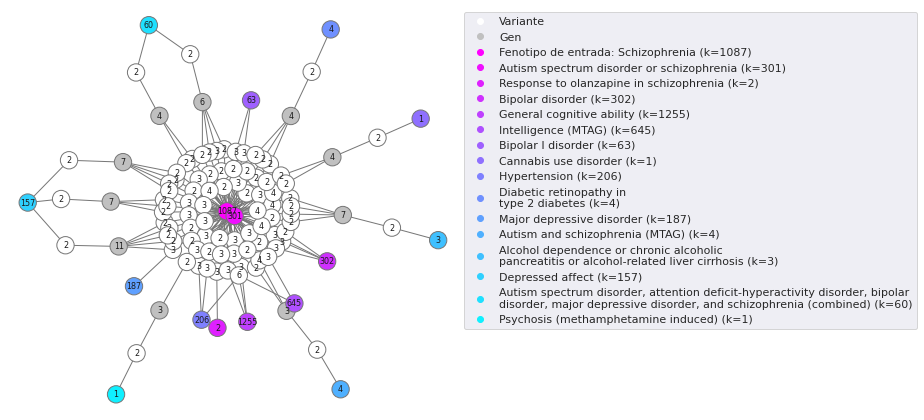

nodos_entrada  \
nodo_salida                                                                                                                                                    
Autism spectrum disorder or schizophrenia                                                                                                      Schizophrenia   
Response to olanzapine in schizophrenia                                                                                                        Schizophrenia   
Bipolar disorder                                                                                                                               Schizophrenia   
General cognitive ability                                                                                                                      Schizophrenia   
Intelligence (MTAG)                                                                                                                            Schizophrenia   
Bipolar I disorder                                                                                                                             Schizophrenia   
Cannabis use disorder                                                                                                                          Schizophrenia   
Hypertension                                                                                                                                   Schizophrenia   
Diabetic retinopathy in type 2 diabetes                                                                                                        Schizophrenia   
Major depressive disorder                                                                                                                      Schizophrenia   
Autism and schizophrenia (MTAG)                                                                                                                Schizophrenia   
Alcohol dependence or chronic alcoholic pancreatitis or alcohol-related liver cirrhosis                                                        Schizophrenia   
Depressed affect                                                                                                                               Schizophrenia   
Autism spectrum disorder, attention deficit-hyperactivity disorder, bipolar disorder, major depressive disorder, and schizophrenia (combined)  Schizophrenia   
Psychosis (methamphetamine induced)                                                                                                            Schizophrenia   

                                                                                                                                               prediccion  \
nodo_salida                                                                                                                                                 
Autism spectrum disorder or schizophrenia                                                                                                        0.014887   
Response to olanzapine in schizophrenia                                                                                                          0.002766   
Bipolar disorder                                                                                                                                 0.002236   
General cognitive ability                                                                                                                        0.001881   
Intelligence (MTAG)                                                                                                                              0.001849   
Bipolar I disorder                                                                                                                               0.001386   
Cannabis use disorder                                                                                                                            0.001358   
Hypertens

100%|██████████| 15/15 [00:00<00:00, 170.38it/s]



 -------------------------------------------------------------------------------- 


47 nodos a conservar


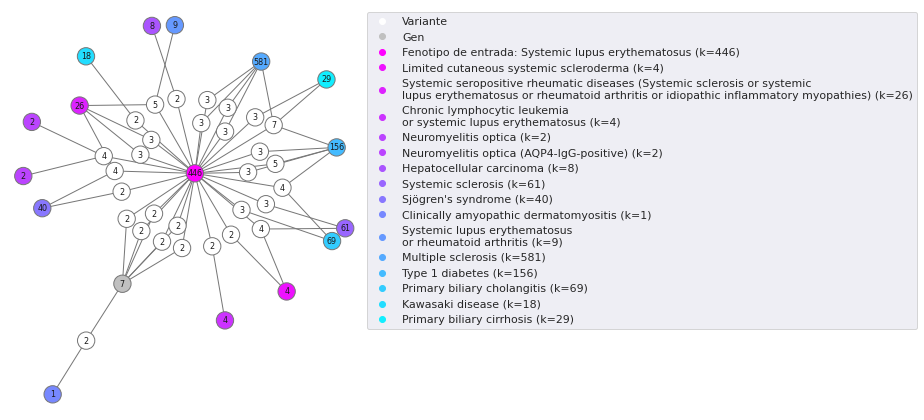

nodos_entrada  \
nodo_salida                                                                                                                                                                                 
Limited cutaneous systemic scleroderma                                                                                                                       Systemic lupus erythematosus   
Systemic seropositive rheumatic diseases (Systemic sclerosis or systemic lupus erythematosus or rheumatoid arthritis or idiopathic inflammatory myopathies)  Systemic lupus erythematosus   
Chronic lymphocytic leukemia or systemic lupus erythematosus                                                                                                 Systemic lupus erythematosus   
Neuromyelitis optica                                                                                                                                         Systemic lupus erythematosus   
Neuromyelitis optica (AQP4-IgG-positive)                                                                                                                     Systemic lupus erythematosus   
Hepatocellular carcinoma                                                                                                                                     Systemic lupus erythematosus   
Systemic sclerosis                                                                                                                                           Systemic lupus erythematosus   
Sjögren's syndrome                                                                                                                                           Systemic lupus erythematosus   
Clinically amyopathic dermatomyositis                                                                                                                        Systemic lupus erythematosus   
Systemic lupus erythematosus or rheumatoid arthritis                                                                                                         Systemic lupus erythematosus   
Multiple sclerosis                                                                                                                                           Systemic lupus erythematosus   
Type 1 diabetes                                                                                                                                              Systemic lupus erythematosus   
Primary biliary cholangitis                                                                                                                                  Systemic lupus erythematosus   
Kawasaki disease                                                                                                                                             Systemic lupus erythematosus   
Primary biliary cirrhosis                                                                                                                                    Systemic lupus erythematosus   

                                                                                                                                                             prediccion  \
nodo_salida                                                                                                                                                               
Limited cutaneous systemic scleroderma                                                                                                                         0.005766   
Systemic seropositive rheumatic diseases (Systemic sclerosis or systemic lupus erythematosus or rheumatoid arthritis or idiopathic inflammatory myopathies)    0.005477   
Chronic lymphocytic leukemia or systemic lupus erythematosus                                                                                                   0.004326   
Neuromyelitis optica                                                                                   

100%|██████████| 15/15 [00:00<00:00, 276.04it/s]



 -------------------------------------------------------------------------------- 


40 nodos a conservar


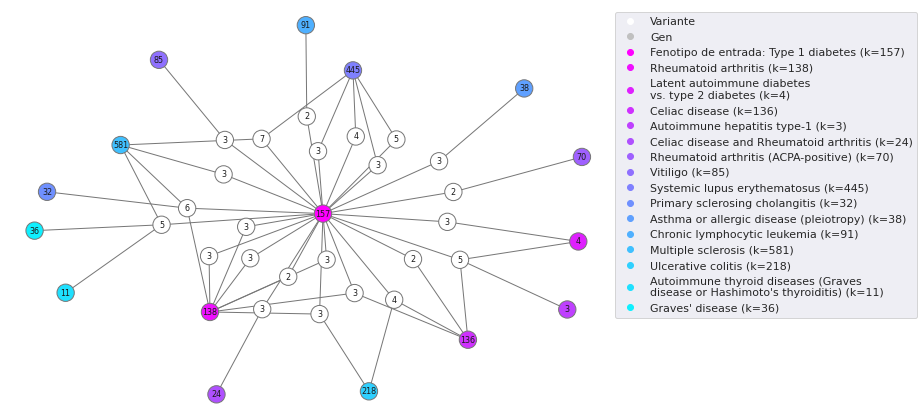

nodos_entrada  \
nodo_salida                                                                                
Rheumatoid arthritis                                                     Type 1 diabetes   
Latent autoimmune diabetes vs. type 2 diabetes                           Type 1 diabetes   
Celiac disease                                                           Type 1 diabetes   
Autoimmune hepatitis type-1                                              Type 1 diabetes   
Celiac disease and Rheumatoid arthritis                                  Type 1 diabetes   
Rheumatoid arthritis (ACPA-positive)                                     Type 1 diabetes   
Vitiligo                                                                 Type 1 diabetes   
Systemic lupus erythematosus                                             Type 1 diabetes   
Primary sclerosing cholangitis                                           Type 1 diabetes   
Asthma or allergic disease (pleiotropy)                                  Type 1 diabetes   
Chronic lymphocytic leukemia                                             Type 1 diabetes   
Multiple sclerosis                                                       Type 1 diabetes   
Ulcerative colitis                                                       Type 1 diabetes   
Autoimmune thyroid diseases (Graves disease or Hashimoto's thyroiditis)  Type 1 diabetes   
Graves' disease                                                          Type 1 diabetes   

                                                                         prediccion  \
nodo_salida                                                                           
Rheumatoid arthritis                                                       0.008358   
Latent autoimmune diabetes vs. type 2 diabetes                             0.006955   
Celiac disease                                                             0.004861   
Autoimmune hepatitis type-1                                                0.003560   
Celiac disease and Rheumatoid arthritis                                    0.003088   
Rheumatoid arthritis (ACPA-positive)                                       0.003048   
Vitiligo                                                                   0.002652   
Systemic lupus erythematosus                                               0.002585   
Primary sclerosing cholangitis                                             0.002385   
Asthma or allergic disease (pleiotropy)                                    0.002370   
Chronic lymphocytic leukemia                                               0.002362   
Multiple sclerosis                                                         0.002099   
Ulcerative colitis                                                         0.002034   
Autoimmune thyroid diseases (Graves disease or Hashimoto's thyroiditis)    0.001804   
Graves' disease                                                            0.001728   

                                                                        tipo_de_nodo  \
nodo_salida                                                                            
Rheumatoid arthritis                                                        fenotipo   
Latent autoimmune diabetes vs. type 2 diabetes                              fenotipo   
Celiac disease                                                              fenotipo   
Autoimmune hepatitis type-1                                                 fenotipo   
Celiac disease and Rheumatoid arthritis                                     fenotipo   
Rheumatoid arthritis (ACPA-positive)                                        fenotipo   
Vitiligo                                                                    fenotipo   
Systemic lupus erythematosus                                                fenotipo   
Primary sclerosing cholangitis                                              fenotipo   
Asthma or allergic disease (pleiotropy)                       

 53%|█████▎    | 8/15 [00:00<00:00, 76.99it/s]



 -------------------------------------------------------------------------------- 




100%|██████████| 15/15 [00:00<00:00, 76.92it/s]


66 nodos a conservar


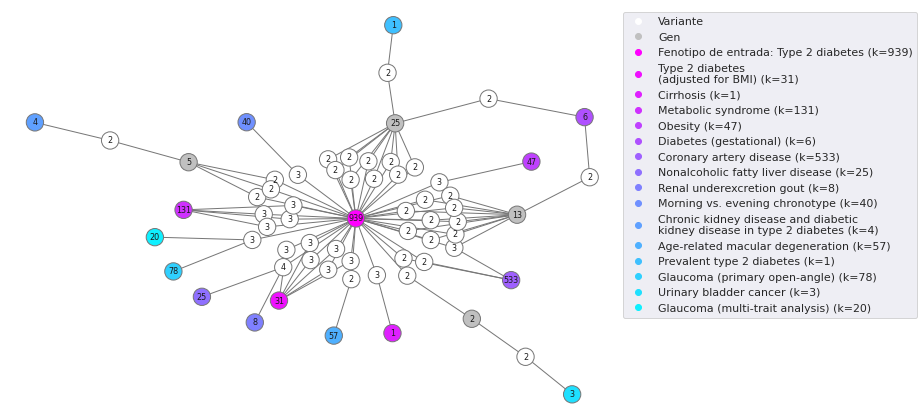

nodos_entrada  \
nodo_salida                                                                              
Type 2 diabetes (adjusted for BMI)                                     Type 2 diabetes   
Cirrhosis                                                              Type 2 diabetes   
Metabolic syndrome                                                     Type 2 diabetes   
Obesity                                                                Type 2 diabetes   
Diabetes (gestational)                                                 Type 2 diabetes   
Coronary artery disease                                                Type 2 diabetes   
Nonalcoholic fatty liver disease                                       Type 2 diabetes   
Renal underexcretion gout                                              Type 2 diabetes   
Morning vs. evening chronotype                                         Type 2 diabetes   
Chronic kidney disease and diabetic kidney disease in type 2 diabetes  Type 2 diabetes   
Age-related macular degeneration                                       Type 2 diabetes   
Prevalent type 2 diabetes                                              Type 2 diabetes   
Glaucoma (primary open-angle)                                          Type 2 diabetes   
Urinary bladder cancer                                                 Type 2 diabetes   
Glaucoma (multi-trait analysis)                                        Type 2 diabetes   

                                                                       prediccion  \
nodo_salida                                                                         
Type 2 diabetes (adjusted for BMI)                                       0.007501   
Cirrhosis                                                                0.003536   
Metabolic syndrome                                                       0.002962   
Obesity                                                                  0.001680   
Diabetes (gestational)                                                   0.001679   
Coronary artery disease                                                  0.001297   
Nonalcoholic fatty liver disease                                         0.001125   
Renal underexcretion gout                                                0.001099   
Morning vs. evening chronotype                                           0.001083   
Chronic kidney disease and diabetic kidney disease in type 2 diabetes    0.001054   
Age-related macular degeneration                                         0.001048   
Prevalent type 2 diabetes                                                0.001021   
Glaucoma (primary open-angle)                                            0.001011   
Urinary bladder cancer                                                   0.001009   
Glaucoma (multi-trait analysis)                                          0.000994   

                                                                      tipo_de_nodo  \
nodo_salida                                                                          
Type 2 diabetes (adjusted for BMI)                                        fenotipo   
Cirrhosis                                                                 fenotipo   
Metabolic syndrome                                                        fenotipo   
Obesity                                                                   fenotipo   
Diabetes (gestational)                                                    fenotipo   
Coronary artery disease                                                   fenotipo   
Nonalcoholic fatty liver disease                                          fenotipo   
Renal underexcretion gout                                                 fenotipo   
Morning vs. evening chronotype                                            fenotipo   
Chronic kidney disease and diabetic kidney disease in type 2 diabetes     fenotipo   
Age-related macular degeneration                                

100%|██████████| 15/15 [00:00<00:00, 145.56it/s]



 -------------------------------------------------------------------------------- 


124 nodos a conservar


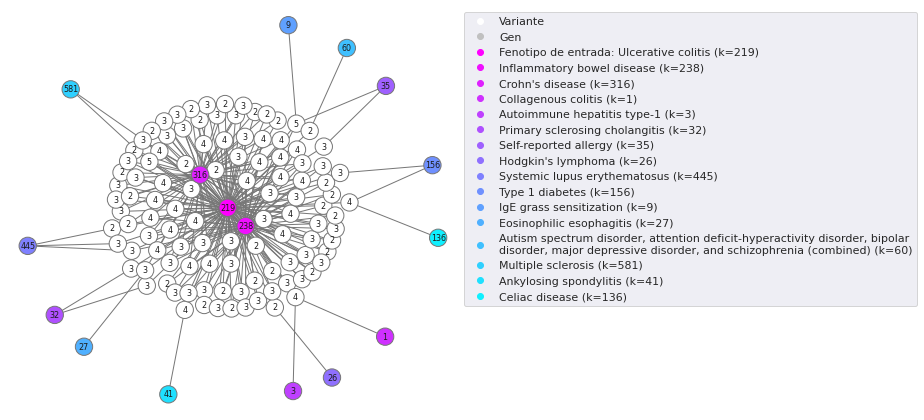

nodos_entrada  \
nodo_salida                                                                                                                                                         
Inflammatory bowel disease                                                                                                                     Ulcerative colitis   
Crohn's disease                                                                                                                                Ulcerative colitis   
Collagenous colitis                                                                                                                            Ulcerative colitis   
Autoimmune hepatitis type-1                                                                                                                    Ulcerative colitis   
Primary sclerosing cholangitis                                                                                                                 Ulcerative colitis   
Self-reported allergy                                                                                                                          Ulcerative colitis   
Hodgkin's lymphoma                                                                                                                             Ulcerative colitis   
Systemic lupus erythematosus                                                                                                                   Ulcerative colitis   
Type 1 diabetes                                                                                                                                Ulcerative colitis   
IgE grass sensitization                                                                                                                        Ulcerative colitis   
Eosinophilic esophagitis                                                                                                                       Ulcerative colitis   
Autism spectrum disorder, attention deficit-hyperactivity disorder, bipolar disorder, major depressive disorder, and schizophrenia (combined)  Ulcerative colitis   
Multiple sclerosis                                                                                                                             Ulcerative colitis   
Ankylosing spondylitis                                                                                                                         Ulcerative colitis   
Celiac disease                                                                                                                                 Ulcerative colitis   

                                                                                                                                               prediccion  \
nodo_salida                                                                                                                                                 
Inflammatory bowel disease                                                                                                                       0.038639   
Crohn's disease                                                                                                                                  0.033741   
Collagenous colitis                                                                                                                              0.005164   
Autoimmune hepatitis type-1                                                                                                                      0.004061   
Primary sclerosing cholangitis                                                                                                                   0.003466   
Self-reported allergy                                                                                                                            0.003017   
Hodgkin's lymphoma                                                                    

100%|██████████| 15/15 [00:00<00:00, 317.92it/s]



 -------------------------------------------------------------------------------- 


52 nodos a conservar


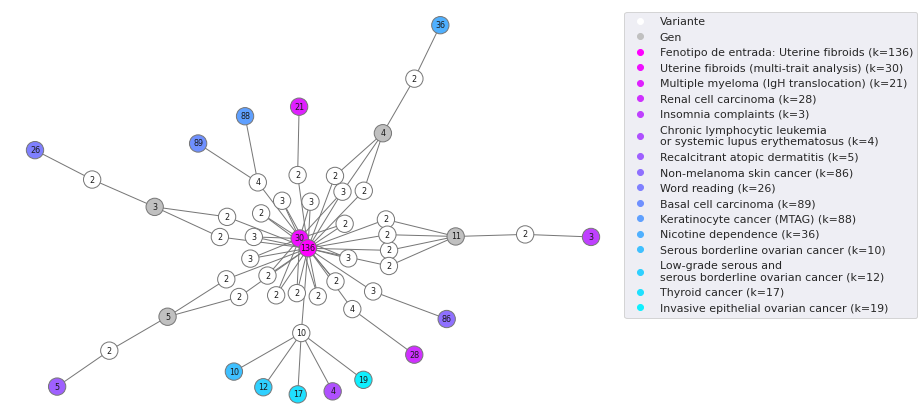

nodos_entrada  \
nodo_salida                                                                      
Uterine fibroids (multi-trait analysis)                       Uterine fibroids   
Multiple myeloma (IgH translocation)                          Uterine fibroids   
Renal cell carcinoma                                          Uterine fibroids   
Insomnia complaints                                           Uterine fibroids   
Chronic lymphocytic leukemia or systemic lupus erythematosus  Uterine fibroids   
Recalcitrant atopic dermatitis                                Uterine fibroids   
Non-melanoma skin cancer                                      Uterine fibroids   
Word reading                                                  Uterine fibroids   
Basal cell carcinoma                                          Uterine fibroids   
Keratinocyte cancer (MTAG)                                    Uterine fibroids   
Nicotine dependence                                           Uterine fibroids   
Serous borderline ovarian cancer                              Uterine fibroids   
Low-grade serous and serous borderline ovarian cancer         Uterine fibroids   
Thyroid cancer                                                Uterine fibroids   
Invasive epithelial ovarian cancer                            Uterine fibroids   

                                                              prediccion  \
nodo_salida                                                                
Uterine fibroids (multi-trait analysis)                         0.033793   
Multiple myeloma (IgH translocation)                            0.004199   
Renal cell carcinoma                                            0.002019   
Insomnia complaints                                             0.001621   
Chronic lymphocytic leukemia or systemic lupus erythematosus    0.001583   
Recalcitrant atopic dermatitis                                  0.001483   
Non-melanoma skin cancer                                        0.001459   
Word reading                                                    0.001333   
Basal cell carcinoma                                            0.001191   
Keratinocyte cancer (MTAG)                                      0.001175   
Nicotine dependence                                             0.001105   
Serous borderline ovarian cancer                                0.001044   
Low-grade serous and serous borderline ovarian cancer           0.000979   
Thyroid cancer                                                  0.000899   
Invasive epithelial ovarian cancer                              0.000893   

                                                             tipo_de_nodo  \
nodo_salida                                                                 
Uterine fibroids (multi-trait analysis)                          fenotipo   
Multiple myeloma (IgH translocation)                             fenotipo   
Renal cell carcinoma                                             fenotipo   
Insomnia complaints                                              fenotipo   
Chronic lymphocytic leukemia or systemic lupus erythematosus     fenotipo   
Recalcitrant atopic dermatitis                                   fenotipo   
Non-melanoma skin cancer                                         fenotipo   
Word reading                                                     fenotipo   
Basal cell carcinoma                                             fenotipo   
Keratinocyte cancer (MTAG)                                       fenotipo   
Nicotine dependence                                              fenotipo   
Serous borderline ovarian cancer                                 fenotipo   
Low-grade serous and serous borderline ovarian cancer            fenotipo   
Thyroid cancer                                                   fenotipo   
Invasive epithelial ovarian cancer                               fenotipo   

                                                              es_fe

100%|██████████| 15/15 [00:00<00:00, 150.77it/s]



 -------------------------------------------------------------------------------- 


57 nodos a conservar


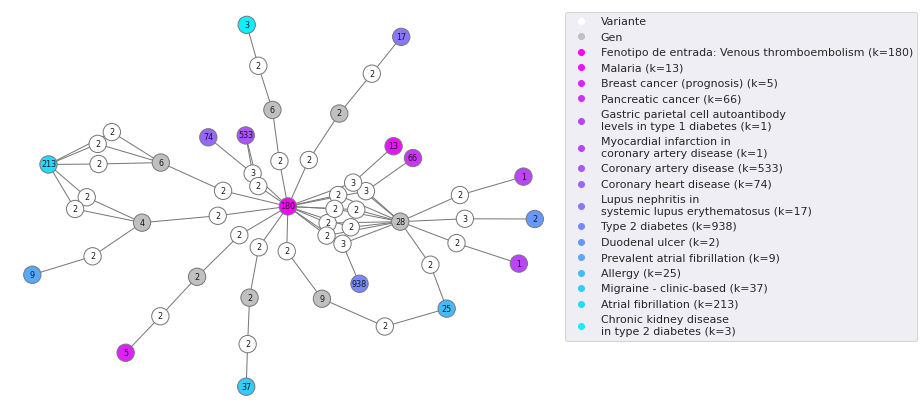

nodos_entrada  \
nodo_salida                                                                            
Malaria                                                       Venous thromboembolism   
Breast cancer (prognosis)                                     Venous thromboembolism   
Pancreatic cancer                                             Venous thromboembolism   
Gastric parietal cell autoantibody levels in type 1 diabetes  Venous thromboembolism   
Myocardial infarction in coronary artery disease              Venous thromboembolism   
Coronary artery disease                                       Venous thromboembolism   
Coronary heart disease                                        Venous thromboembolism   
Lupus nephritis in systemic lupus erythematosus               Venous thromboembolism   
Type 2 diabetes                                               Venous thromboembolism   
Duodenal ulcer                                                Venous thromboembolism   
Prevalent atrial fibrillation                                 Venous thromboembolism   
Allergy                                                       Venous thromboembolism   
Migraine - clinic-based                                       Venous thromboembolism   
Atrial fibrillation                                           Venous thromboembolism   
Chronic kidney disease in type 2 diabetes                     Venous thromboembolism   

                                                              prediccion  \
nodo_salida                                                                
Malaria                                                         0.003880   
Breast cancer (prognosis)                                       0.001747   
Pancreatic cancer                                               0.001631   
Gastric parietal cell autoantibody levels in type 1 diabetes    0.001603   
Myocardial infarction in coronary artery disease                0.001603   
Coronary artery disease                                         0.001472   
Coronary heart disease                                          0.001240   
Lupus nephritis in systemic lupus erythematosus                 0.001021   
Type 2 diabetes                                                 0.000875   
Duodenal ulcer                                                  0.000711   
Prevalent atrial fibrillation                                   0.000592   
Allergy                                                         0.000586   
Migraine - clinic-based                                         0.000581   
Atrial fibrillation                                             0.000565   
Chronic kidney disease in type 2 diabetes                       0.000559   

                                                             tipo_de_nodo  \
nodo_salida                                                                 
Malaria                                                          fenotipo   
Breast cancer (prognosis)                                        fenotipo   
Pancreatic cancer                                                fenotipo   
Gastric parietal cell autoantibody levels in type 1 diabetes     fenotipo   
Myocardial infarction in coronary artery disease                 fenotipo   
Coronary artery disease                                          fenotipo   
Coronary heart disease                                           fenotipo   
Lupus nephritis in systemic lupus erythematosus                  fenotipo   
Type 2 diabetes                                                  fenotipo   
Duodenal ulcer                                                   fenotipo   
Prevalent atrial fibrillation                                    fenotipo   
Allergy                                                          fenotipo   
Migraine - clinic-based                                          fenotipo   
Atrial fibrillation                                              fenotipo   
Chronic kidney disease in type 2 diabetes        



 -------------------------------------------------------------------------------- 




In [6]:
from matplotlib.lines import Line2D

def sanitizar(s):
    return (
        s
        .replace(" ", "_").replace("'", "-")
        .replace("(", "").replace(")", "")
        .lower()
    )


for feno_entrada, df in resultados.groupby("nodos_entrada"):   
    top_n_fenos = 15
    grado = red.degree(feno_entrada)
    fenotipos = df.query("es_fenotipo").head(top_n_fenos).set_index('nodo_salida')
    min_val = fenotipos.prediccion.min()
    df = df.query("prediccion >= @min_val")

    subred = red.subgraph(list(df.nodo_salida) + [feno_entrada])

    nodos_a_conservar = set()

    for feno_salida in tqdm(fenotipos.index):
        nodos_a_conservar |= set(flatten(list(nx.all_shortest_paths(subred, feno_entrada, feno_salida))))
        # nodos_en_caminos = nx.all_simple_paths(subred, feno_entrada, feno_salida, cutoff=6)
        # nodos_a_conservar |= set(flatten(list(nodos_en_caminos)))
        
    print(f"{len(nodos_a_conservar):,} nodos a conservar")

    subred_trunc = subred.subgraph(list(nodos_a_conservar) + [feno_entrada])
    df = df[df.nodo_salida.isin(subred_trunc.nodes())].reset_index()

    pos = nx.kamada_kawai_layout(subred_trunc)

    rankings_unicos = fenotipos.pred_rank.unique()
    colores = sns.color_palette("cool_r", n_colors=len(rankings_unicos)).as_hex()
    rank2color = dict(zip(rankings_unicos, colores))
    fenotipos["color"] = fenotipos.pred_rank.map(rank2color)

    def color_del_nodo(nodo):
        tipo = red.nodes[nodo]['tipo']

        if nodo == feno_entrada:
            return 'fuchsia'
        if tipo == 'gen':
            return 'silver'
        if tipo == 'alelo':
            return 'white'
        if tipo == 'fenotipo':
            return fenotipos.color[nodo]

        raise Exception(f"{nodo} ({tipo}) no tiene color")


    node_colors = [color_del_nodo(nodo) for nodo in subred_trunc.nodes()]
    node_labels = {nodo: str(k) for nodo, k in df.set_index('nodo_salida').k_nodo_salida.items()
                   if nodo in subred_trunc.nodes()}
    node_labels[feno_entrada] = grado
    
    plt.figure(figsize=(13, 6))
    ax = plt.subplot(1, 1, 1)
    nx.draw(subred_trunc, pos=pos, labels=node_labels, node_size=300, alpha=1,
            node_color=node_colors, edgecolors="#777777", ax=ax, edge_color="#777777", font_size=8)
    # ax.set_title(f"Nodo de entrada:\n{feno_entrada} (k={grado})")
    
    opts = {'xdata': [0], 'ydata': [0], 'marker': 'o', 'linestyle': ''}
    legend_elements = [
        Line2D(**opts, color='white', label='Variante'),
        Line2D(**opts, color='silver', label='Gen'),
        Line2D(**opts, color='fuchsia',
               label=f'Fenotipo de entrada: {feno_entrada} (k={grado})'),       
        *[Line2D(**opts, color=row.color, 
                 label=f"{break_long_text(feno)} (k={row.k_nodo_salida})")
          for feno, row in fenotipos.iterrows()]
    ]
    
    ax.legend(handles=legend_elements, bbox_to_anchor=(1, 1))

    out_dir = "results/LS_red_completa_plots"
    fp = f"{out_dir}/{sanitizar(feno_entrada)}.png"
    
    plt.tight_layout()
    plt.savefig(fp, dpi=100)
    plt.show()
    display(fenotipos)
    print("\n\n", "-" * 80, "\n\n")
    # break